### Часть 1

1) Загрузите данные ex2data1.txt из текстового файла.

In [2]:
DATA_PATH = '/home/ataleckij/Projects/university/mo/Data/Lab 2/'

In [3]:
files_names = !ls '{DATA_PATH}'
files_names

['ex2data1.txt', 'ex2data2.txt', 'ex2data3.mat']

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

files_paths = [os.path.join(DATA_PATH, name) for name in files_names]

In [5]:
files_paths = [os.path.join(DATA_PATH, name) for name in files_names]

сolumns = ['оценка первый экзамен', 'оценка второй экзамен', 'поступил']
df1 = pd.read_csv(files_paths[0], header=None, names=сolumns)
df1

,оценка первый экзамен,оценка второй экзамен,поступил
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


2) Постройте график, где по осям откладываются оценки по предметам, а точки обозначаются двумя разными маркерами в зависимости от того, поступил ли данный студент в университет или нет.

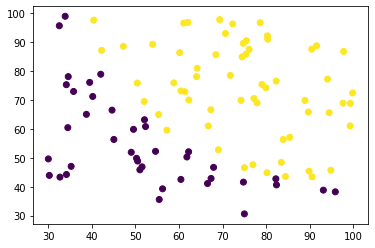

In [6]:
plt.scatter(df1['оценка первый экзамен'].values, 
            df1['оценка второй экзамен'].values, 
            c=df1['поступил'].values)
plt.show()

3) Реализуйте функции потерь J(θ) и градиентного спуска для логистической регрессии с использованием векторизации.

In [7]:
@np.vectorize
def hack_log(x):
    return np.log(x) if x != 0 else 0

def loss(y_pred, y_true):
    y_pred, y_true = np.array(y_pred), np.array(y_true)
    if np.isnan(-(y_true * hack_log(y_pred) + (1-y_true) * hack_log(1-y_pred)).mean()):
        print(y_pred)
        print(y_true)
    return -(y_true * hack_log(y_pred) + (1-y_true) * hack_log(1-y_pred)).mean()

In [8]:
@np.vectorize
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [9]:
class LogRegression:
    def __init__(self, w=None, lr=0.01):
        self.w = np.array(w) if not (isinstance(w, np.ndarray) or w is None) else w
        self.lr = lr
        self.history = []
    
    def _calc_grad(self, data_with_offset, labels):
        return ((self.predict(data_with_offset) - labels) * data_with_offset.T).T.mean(axis=0)
    
    def fit(self, data, labels, max_iters=None, optimizer='grad', verbosity=False):
        data, labels = np.array(data), np.array(labels)
        
        if self.w is None:
            self.w = np.zeros(data.shape[1] + 1)
        else:
            assert self.w.shape[0] == (data.shape[1] + 1)
        
        data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        
        if optimizer == 'grad':
            grad = self._calc_grad(data_with_offset, labels)
            zero_grad = np.zeros(grad.shape)
            iterarion = 0
            self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
            print(self.history[-1][:2])
            while not np.allclose(grad, zero_grad):
                self.w -= self.lr * grad
                grad = self._calc_grad(data_with_offset, labels)
                iterarion += 1
                self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
                if verbosity:
                    print(self.history[-1][:2])
                print(self.history[-1][:2])
                if max_iters and max_iters <= iterarion:
                    break
            print(self.history[-1][:2])
        elif optimizer == 'bfgs':
            pass
        elif optimizer == 'bfgs':
            pass
        else:
            raise NotImplementedError()
        
    
    def predict(self, data):
        data = np.array(data)
        if self.w.shape[0] == data.shape[1]:
            data_with_offset = data
        else:
            data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        return sigmoid(data_with_offset.dot(self.w))

In [10]:
from sklearn.preprocessing import StandardScaler

data1, labels1 = df1[сolumns[:-1]], df1[сolumns[-1]]

scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(data1)

lr_grad = LogRegression(lr=1)
lr_grad.fit(scaled_data1, labels1)

(0, 0.6931471805599453)
(1, 0.559403242545655)
(2, 0.480587664853387)
(3, 0.43046342235936136)
(4, 0.3960564700549831)
(5, 0.37096692788942354)
(6, 0.35181143821554683)
(7, 0.3366625823479171)
(8, 0.3243484792498155)
(9, 0.31411698799771764)
(10, 0.3054632898746155)
(11, 0.2980357306412133)
(12, 0.29158158307561594)
(13, 0.28591434088214984)
(14, 0.2808932044202075)
(15, 0.2764097679797487)
(16, 0.2723791206465764)
(17, 0.2687337409240408)
(18, 0.2654192108626502)
(19, 0.2623911455046634)
(20, 0.25961295257859074)
(21, 0.25705417096290983)
(22, 0.2546892200293838)
(23, 0.2524964455319526)
(24, 0.25045738276072227)
(25, 0.24855618107480798)
(26, 0.24677914982076543)
(27, 0.2451143966177868)
(28, 0.24355153668345658)
(29, 0.24208145734126255)
(30, 0.24069612578706728)
(31, 0.23938843105923613)
(32, 0.23815205326945046)
(33, 0.23698135472344692)
(34, 0.23587128874252009)
(35, 0.23481732289271776)
(36, 0.23381537401406827)
(37, 0.23286175297064188)
(38, 0.2319531174528028)
(39, 0.231086431

(423, 0.20357428594236407)
(424, 0.20357335772417953)
(425, 0.2035724410274352)
(426, 0.20357153570412317)
(427, 0.20357064160823035)
(428, 0.20356975859570958)
(429, 0.2035688865244516)
(430, 0.20356802525425738)
(431, 0.20356717464681032)
(432, 0.20356633456564985)
(433, 0.20356550487614478)
(434, 0.20356468544546694)
(435, 0.2035638761425659)
(436, 0.20356307683814343)
(437, 0.20356228740462878)
(438, 0.20356150771615372)
(439, 0.2035607376485291)
(440, 0.2035599770792205)
(441, 0.20355922588732495)
(442, 0.203558483953548)
(443, 0.20355775116018102)
(444, 0.20355702739107862)
(445, 0.20355631253163703)
(446, 0.2035556064687718)
(447, 0.20355490909089713)
(448, 0.20355422028790435)
(449, 0.20355353995114142)
(450, 0.20355286797339253)
(451, 0.2035522042488579)
(452, 0.2035515486731339)
(453, 0.2035509011431939)
(454, 0.20355026155736888)
(455, 0.20354962981532826)
(456, 0.20354900581806168)
(457, 0.20354838946786036)
(458, 0.20354778066829923)
(459, 0.20354717932421892)
(460, 0.2035

(845, 0.20349822320395677)
(846, 0.20349821715751004)
(847, 0.20349821118129166)
(848, 0.20349820527448334)
(849, 0.20349819943627653)
(850, 0.20349819366587227)
(851, 0.2034981879624808)
(852, 0.20349818232532166)
(853, 0.2034981767536235)
(854, 0.2034981712466239)
(855, 0.20349816580356944)
(856, 0.20349816042371566)
(857, 0.20349815510632652)
(858, 0.20349814985067485)
(859, 0.20349814465604177)
(860, 0.20349813952171697)
(861, 0.20349813444699816)
(862, 0.20349812943119172)
(863, 0.20349812447361182)
(864, 0.20349811957358072)
(865, 0.2034981147304283)
(866, 0.20349810994349304)
(867, 0.20349810521212036)
(868, 0.20349810053566372)
(869, 0.20349809591348397)
(870, 0.20349809134494962)
(871, 0.20349808682943643)
(872, 0.20349808236632744)
(873, 0.20349807795501285)
(874, 0.20349807359489025)
(875, 0.20349806928536382)
(876, 0.20349806502584517)
(877, 0.20349806081575245)
(878, 0.20349805665451065)
(879, 0.2034980525415517)
(880, 0.20349804847631398)
(881, 0.20349804445824227)
(882, 

(1288, 0.20349770460887523)
(1289, 0.20349770457400382)
(1290, 0.20349770453953517)
(1291, 0.20349770450546456)
(1292, 0.20349770447178758)
(1293, 0.20349770443849954)
(1294, 0.20349770440559603)
(1295, 0.20349770437307252)
(1296, 0.20349770434092482)
(1297, 0.2034977043091483)
(1298, 0.20349770427773883)
(1299, 0.20349770424669217)
(1300, 0.2034977042160041)
(1301, 0.2034977041856705)
(1302, 0.2034977041556874)
(1303, 0.20349770412605042)
(1304, 0.20349770409675583)
(1305, 0.2034977040677996)
(1306, 0.20349770403917788)
(1307, 0.20349770401088665)
(1308, 0.20349770398292225)
(1309, 0.20349770395528083)
(1310, 0.20349770392795868)
(1311, 0.20349770390095215)
(1312, 0.2034977038742575)
(1313, 0.20349770384787116)
(1314, 0.20349770382178956)
(1315, 0.20349770379600926)
(1316, 0.20349770377052667)
(1317, 0.20349770374533846)
(1318, 0.20349770372044115)
(1319, 0.20349770369583145)
(1320, 0.2034977036715059)
(1321, 0.20349770364746134)
(1322, 0.20349770362369454)
(1323, 0.2034977036002022)


(1720, 0.2034977016094373)
(1721, 0.20349770160920638)
(1722, 0.20349770160897815)
(1723, 0.20349770160875258)
(1724, 0.2034977016085296)
(1725, 0.2034977016083092)
(1726, 0.20349770160809136)
(1727, 0.203497701607876)
(1728, 0.20349770160766315)
(1729, 0.20349770160745279)
(1730, 0.20349770160724479)
(1731, 0.2034977016070392)
(1732, 0.203497701606836)
(1733, 0.20349770160663522)
(1734, 0.20349770160643665)
(1735, 0.20349770160624042)
(1736, 0.20349770160604647)
(1737, 0.20349770160585468)
(1738, 0.20349770160566513)
(1739, 0.20349770160547784)
(1740, 0.2034977016052927)
(1741, 0.20349770160510963)
(1742, 0.20349770160492875)
(1743, 0.20349770160474986)
(1744, 0.20349770160457317)
(1745, 0.20349770160439842)
(1746, 0.2034977016042257)
(1747, 0.203497701604055)
(1748, 0.20349770160388625)
(1749, 0.20349770160371947)
(1750, 0.20349770160355457)
(1751, 0.2034977016033916)
(1752, 0.20349770160323055)
(1753, 0.20349770160307135)
(1754, 0.20349770160291394)
(1755, 0.20349770160275835)
(1756

(2149, 0.20349770158957725)
(2150, 0.2034977015895757)
(2151, 0.20349770158957414)
(2152, 0.2034977015895726)
(2153, 0.20349770158957103)
(2154, 0.20349770158956954)
(2155, 0.20349770158956804)
(2156, 0.20349770158956657)
(2157, 0.20349770158956512)
(2158, 0.2034977015895636)
(2159, 0.20349770158956218)
(2160, 0.2034977015895608)
(2161, 0.2034977015895594)
(2162, 0.20349770158955802)
(2163, 0.20349770158955674)
(2164, 0.2034977015895553)
(2165, 0.20349770158955396)
(2166, 0.20349770158955263)
(2167, 0.20349770158955136)
(2168, 0.2034977015895501)
(2169, 0.2034977015895488)
(2170, 0.20349770158954758)
(2171, 0.2034977015895464)
(2172, 0.20349770158954508)
(2173, 0.20349770158954394)
(2174, 0.20349770158954272)
(2175, 0.20349770158954153)
(2176, 0.20349770158954034)
(2177, 0.20349770158953917)
(2178, 0.20349770158953803)
(2179, 0.20349770158953692)
(2180, 0.20349770158953576)
(2181, 0.20349770158953465)
(2182, 0.20349770158953354)
(2183, 0.20349770158953256)
(2184, 0.20349770158953145)
(

4) Реализуйте другие методы (как минимум 2) оптимизации для реализованной функции стоимости (например, Метод Нелдера — Мида, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно, генетические методы и т.п.). Разрешается использовать библиотечные реализации методов оптимизации (например, из библиотеки scipy).

In [11]:
from scipy.optimize import minimize

class LogRegression:
    def __init__(self, w=None, lr=0.01):
        self.w = np.array(w) if not (isinstance(w, np.ndarray) or w is None) else w
        self.lr = lr
        self.history = []
    
    def _calc_grad(self, data_with_offset, labels):
        return ((self.predict(data_with_offset) - labels) * data_with_offset.T).T.mean(axis=0)
    
    def fit(self, data, labels, max_iters=None, optimizer='grad', verbosity=False):
        data, labels = np.array(data), np.array(labels)
        
        if self.w is None:
            self.w = np.zeros(data.shape[1] + 1)
        else:
            assert self.w.shape[0] == (data.shape[1] + 1)
        
        data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        print(loss(self.predict(data_with_offset), labels))
        
        if optimizer == 'grad':
            grad = self._calc_grad(data_with_offset, labels)
            zero_grad = np.zeros(grad.shape)
            iterarion = 0
            self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
            while not np.allclose(grad, zero_grad):
                self.w -= self.lr * grad
                grad = self._calc_grad(data_with_offset, labels)
                iterarion += 1
                self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
                if verbosity:
                    print(self.history[-1][:2])
                if max_iters and max_iters <= iterarion:
                    break
        elif optimizer in ['BFGS', 'Nelder-Mead']:
            def goal_func(w):
                predicted_labels = LogRegression(w=w).predict(data_with_offset)
                return loss(predicted_labels, labels)
            self.w = minimize(goal_func, self.w, method=optimizer).x
        else:
            raise NotImplementedError()
        
        print(loss(self.predict(data_with_offset), labels))
        
    
    def predict(self, data):
        data = np.array(data)
        if self.w.shape[0] == data.shape[1]:
            data_with_offset = data
        else:
            data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        return sigmoid(data_with_offset.dot(self.w))

In [12]:
# from sklearn.preprocessing import StandardScaler

# data1, labels1 = df1[сolumns[:-1]], df1[сolumns[-1]]

# # scaler = StandardScaler()
# # scaled_data1 = scaler.fit_transform(data1)

lr_bfgs = LogRegression(lr=1)
lr_bfgs.fit(scaled_data1, labels1, optimizer='BFGS')

0.6931471805599453
0.2034977023510503


In [13]:
# from sklearn.preprocessing import StandardScaler

# data1, labels1 = df1[сolumns[:-1]], df1[сolumns[-1]]

# scaler = StandardScaler()
# scaled_data1 = scaler.fit_transform(data1)

lr_nm = LogRegression(lr=1)
lr_nm.fit(scaled_data1, labels1, optimizer='Nelder-Mead')

0.6931471805599453
0.2034977015994987


5) Реализуйте функцию предсказания вероятности поступления студента в зависимости от значений оценок по экзаменам

In [14]:
optimizer_to_model = {
    'grad': lr_grad,
    'BFGS': lr_bfgs,
    'Nelder-Mead': lr_nm
}

def proba_entered_the_university(mark1, mark2, optimizer='grad'):
    data = scaler.transform([[mark1, mark2]])
    model = optimizer_to_model[optimizer]
    proba = model.predict(data)[0]
    return proba

In [15]:
print(proba_entered_the_university(60, 70, optimizer='grad'))
print(proba_entered_the_university(60, 70, optimizer='BFGS'))
print(proba_entered_the_university(60, 70, optimizer='Nelder-Mead'))

0.7884454969802566
0.788425349418878
0.7884474502419888


6) Постройте разделяющую прямую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 2.

In [16]:
lr_grad.w

array([1.71844868, 3.99278587, 3.72513483])

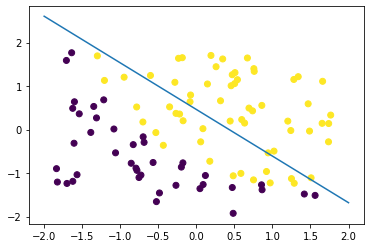

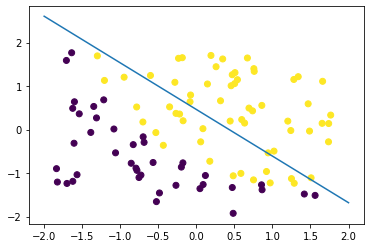

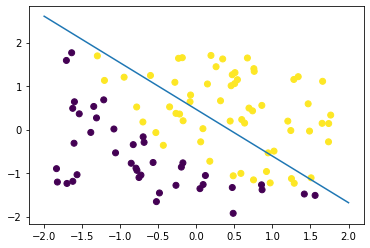

In [17]:
x = np.linspace(-2, 2, 100)

w_grad = lr_grad.w
w_bfgs = lr_bfgs.w
w_nm = lr_nm.w

def get_foo(w):
    @np.vectorize
    def foo(x):
        return -w[1]*x/w[2] + w[0]/w[2] 
    return foo

plt.scatter(scaled_data1[:, 0], 
            scaled_data1[:, 1], 
            c=labels1)
plt.plot(x, get_foo(w_grad)(x))
plt.show()

plt.scatter(scaled_data1[:, 0], 
            scaled_data1[:, 1], 
            c=labels1)
plt.plot(x, get_foo(w_bfgs)(x))
plt.show()

plt.scatter(scaled_data1[:, 0], 
            scaled_data1[:, 1], 
            c=labels1)
plt.plot(x, get_foo(w_nm)(x))
plt.show()

### Часть 2

7) Загрузите данные ex2data2.txt из текстового файла.

In [18]:
сolumns = ['результат первого теста', 'результат второго теста', 'результат прохождения контроля']
df2 = pd.read_csv(files_paths[1], header=None, names=сolumns)
df2

,результат первого теста,результат второго теста,результат прохождения контроля
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


8) Постройте график, где по осям откладываются результаты тестов, а точки обозначаются двумя разными маркерами в зависимости от того, прошло ли изделие контроль или нет.

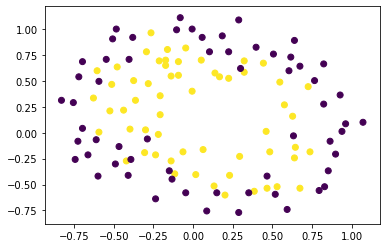

In [19]:
plt.scatter(df2['результат первого теста'].values, 
            df2['результат второго теста'].values, 
            c=df2['результат прохождения контроля'].values)
plt.show()

9) Постройте все возможные комбинации признаков x1 (результат первого теста) и x2 (результат второго теста), в которых степень полинома не превышает 6, т.е. 1, x1, x2, x12, x1x2, x22, …, x1x25, x26 (всего 28 комбинаций).

In [22]:
import itertools

def combine_features(df: pd.DataFrame, power:int, labels_column_name: str=None):
    if labels_column_name:
        features_columns = [column for column in df.columns if column != labels_column_name]
    assert len(features_columns) == 2
    feature1: np.ndarray = df[features_columns[0]].values
    feature2: np.ndarray = df[features_columns[1]].values
    powers = list(range(power + 1))
    features_combinations_list = []
    for i, j in itertools.product(powers, powers):
        if (i + j) > power:
            continue
        features_combination = (feature1 ** i) * (feature2 ** j)
        features_combinations_list.append(features_combination)
    if power == 6:
        assert len(features_combinations_list) == 28
    features_combinations: np.ndarray = np.vstack(features_combinations_list).T
    df2_combined_features = pd.DataFrame.from_records(features_combinations)
#     df2_combined[labels_column_name] = df[labels_column_name]
    return df2_combined_features

labels_column_name='результат прохождения контроля'
df2_features = df2[[column for column in df2.columns if column != labels_column_name]]
df2_combined_features = combine_features(df2, power=6, labels_column_name=labels_column_name)
labels_series = df2[labels_column_name]
df2_combined_features.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,0.025089,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,-0.043509,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,-0.102412,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,-0.094573,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,-0.111283,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


10) Реализуйте L2-регуляризацию для логистической регрессии и обучите ее на расширенном наборе признаков методом градиентного спуска.

11) Реализуйте другие методы оптимизации.

In [23]:
def loss_l2(y_pred, y_true, w, lambda_):
    y_pred, y_true, w = np.array(y_pred), np.array(y_true), np.array(w)
    if np.isnan(-(y_true * hack_log(y_pred) + (1-y_true) * hack_log(1-y_pred)).mean()):
        print(y_pred)
        print(y_true)
    loss_values = -(y_true * hack_log(y_pred) + (1-y_true) * hack_log(1-y_pred))
    loss_value = loss_values.sum()
    l2_value = lambda_ * w.dot(w) / 2
    return loss_value / loss_values.shape[0] + l2_value

In [56]:
from scipy.optimize import minimize

class LogRegressionL2:
    def __init__(self, w=None, lr=0.01, lambda_=0.001):
        self.w = np.array(w) if not (isinstance(w, np.ndarray) or w is None) else w
        self.lr = lr
        self.history = []
        self.lambda_ = lambda_
        assert self.lr * self.lambda_ < 1
    
    def _calc_grad(self, prediction, labels, data_with_offset):
        return ((prediction - labels) * data_with_offset.T).T.mean(axis=0)
    
    def _log_history(self, iterarion, prediction, labels, grad):
        loss_value = loss_l2(prediction, labels, w=self.w, lambda_=self.lambda_)
        self.history.append((iterarion, loss_value, grad))
    
    def fit(self, data, labels, max_iters=None, optimizer='grad', verbosity=False):
        data, labels = np.array(data), np.array(labels)
        
        if self.w is None:
            self.w = np.zeros(data.shape[1] + 1)
        else:
            assert self.w.shape[0] == (data.shape[1] + 1)
        
        data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        prediction = self.predict(data_with_offset)
        if verbosity:
            print(loss_l2(prediction, labels, w=self.w, lambda_=self.lambda_))
        
        if optimizer == 'grad':
#             prediction = self.predict(data_with_offset)
            grad = self._calc_grad(prediction, labels, data_with_offset)
#             l2_part_value = self.lambda_ * self.w / data_with_offset.shape[0]
            l2_part_value = self.lambda_ * self.w
            iterarion = 0
            self._log_history(iterarion, prediction, labels, grad)
            while not np.allclose(self.lr * (grad + l2_part_value), np.zeros(grad.shape)):
#                 l2_part_value = self.lambda_ * self.w / data_with_offset.shape[0]
                l2_part_value = self.lambda_ * self.w
                self.w -= self.lr * (grad + l2_part_value)
                prediction = self.predict(data_with_offset)
                grad = self._calc_grad(prediction, labels, data_with_offset)
                iterarion += 1
                self._log_history(iterarion, prediction, labels, grad)
                if verbosity:
                    print(self.history[-1][:2])
                if max_iters and max_iters <= iterarion:
                    break
        elif optimizer in ['BFGS', 'Nelder-Mead']:
            def goal_func(w):
                predicted_labels = LogRegressionL2(w=w).predict(data_with_offset)
                return loss_l2(predicted_labels, labels, w=w, lambda_=self.lambda_)
            self.w = minimize(goal_func, self.w, method=optimizer).x
        else:
            raise NotImplementedError()
        
        prediction = self.predict(data_with_offset)
        if verbosity:
            print(loss_l2(prediction, labels, w=self.w, lambda_=self.lambda_))
        
    
    def predict(self, data):
        data = np.array(data)
        if self.w.shape[0] == data.shape[1]:
            data_with_offset = data
        else:
            data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        return sigmoid(data_with_offset.dot(self.w))

In [25]:
from datetime import datetime

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_combined_features = scaler.fit_transform(df2_combined_features)

lrl2_grad = LogRegressionL2(lr=1, lambda_=0.001)

time1 = datetime.now()
lrl2_grad.fit(df2_combined_features, labels_series, optimizer='grad', verbosity=True)
print((datetime.now() - time1).total_seconds(), 'seconds'.upper())

0.6931471805599454
(1, 0.681312893195231)
(2, 0.671992802776741)
(3, 0.6637536652530316)
(4, 0.6562522971254241)
(5, 0.6493467483299828)
(6, 0.6429440434991006)
(7, 0.6369718701901759)
(8, 0.6313715033972972)
(9, 0.6260947072708498)
(10, 0.6211016560498076)
(11, 0.6163593213843845)
(12, 0.6118401821776979)
(13, 0.6075211877999745)
(14, 0.6033829248098552)
(15, 0.5994089471337888)
(16, 0.5955852371987599)
(17, 0.5918997718012862)
(18, 0.5883421717004486)
(19, 0.5849034181638632)
(20, 0.5815756231104923)
(21, 0.578351842222781)
(22, 0.575225922570669)
(23, 0.5721923780114065)
(24, 0.5692462869931797)
(25, 0.5663832084712673)
(26, 0.5635991125023596)
(27, 0.5608903227628211)
(28, 0.5582534687774132)
(29, 0.5556854460756507)
(30, 0.5531833828366399)
(31, 0.550744611858065)
(32, 0.5483666469052422)
(33, 0.5460471626730493)
(34, 0.5437839777359287)
(35, 0.5415750399760033)
(36, 0.5394184140722065)
(37, 0.5373122707085269)
(38, 0.5352548772205237)
(39, 0.5332445894489264)
(40, 0.5312798446095

(427, 0.40830446682116744)
(428, 0.4082772512049195)
(429, 0.40825023010780453)
(430, 0.4082234018845734)
(431, 0.40819676490592705)
(432, 0.40817031755834116)
(433, 0.40814405824389205)
(434, 0.4081179853800858)
(435, 0.4080920973996887)
(436, 0.40806639275056017)
(437, 0.4080408698954879)
(438, 0.40801552731202506)
(439, 0.40799036349232853)
(440, 0.4079653769430007)
(441, 0.4079405661849322)
(442, 0.40791592975314656)
(443, 0.4078914661966478)
(444, 0.4078671740782682)
(445, 0.4078430519745196)
(446, 0.40781909847544506)
(447, 0.4077953121844742)
(448, 0.4077716917182776)
(449, 0.40774823570662655)
(450, 0.4077249427922504)
(451, 0.40770181163069935)
(452, 0.40767884089020656)
(453, 0.40765602925155264)
(454, 0.4076333754079323)
(455, 0.40761087806482194)
(456, 0.40758853593984823)
(457, 0.40756634776266043)
(458, 0.4075443122748017)
(459, 0.40752242822958407)
(460, 0.407500694391963)
(461, 0.40747910953841565)
(462, 0.4074576724568177)
(463, 0.4074363819463246)
(464, 0.407415236817

(761, 0.4045495533423226)
(762, 0.40454570246588073)
(763, 0.40454186979959156)
(764, 0.4045380552363863)
(765, 0.4045342586699395)
(766, 0.40453047999466324)
(767, 0.4045267191057018)
(768, 0.40452297589892594)
(769, 0.40451925027092617)
(770, 0.40451554211900886)
(771, 0.4045118513411889)
(772, 0.4045081778361857)
(773, 0.4045045215034168)
(774, 0.40450088224299297)
(775, 0.40449725995571195)
(776, 0.40449365454305464)
(777, 0.4044900659071784)
(778, 0.4044864939509123)
(779, 0.40448293857775225)
(780, 0.4044793996918551)
(781, 0.40447587719803474)
(782, 0.40447237100175576)
(783, 0.4044688810091288)
(784, 0.4044654071269066)
(785, 0.404461949262477)
(786, 0.40445850732386035)
(787, 0.40445508121970275)
(788, 0.4044516708592727)
(789, 0.4044482761524549)
(790, 0.4044448970097471)
(791, 0.4044415333422542)
(792, 0.40443818506168355)
(793, 0.4044348520803418)
(794, 0.40443153431112844)
(795, 0.4044282316675324)
(796, 0.40442494406362733)
(797, 0.4044216714140671)
(798, 0.40441841363408

(1188, 0.4037834369724047)
(1189, 0.4037826985985653)
(1190, 0.4037819626268153)
(1191, 0.40378122904800695)
(1192, 0.40378049785303494)
(1193, 0.4037797690328362)
(1194, 0.40377904257838987)
(1195, 0.4037783184807161)
(1196, 0.4037775967308772)
(1197, 0.4037768773199762)
(1198, 0.4037761602391578)
(1199, 0.40377544547960675)
(1200, 0.4037747330325489)
(1201, 0.40377402288925024)
(1202, 0.40377331504101677)
(1203, 0.4037726094791946)
(1204, 0.4037719061951692)
(1205, 0.40377120518036586)
(1206, 0.40377050642624884)
(1207, 0.40376980992432143)
(1208, 0.403769115666126)
(1209, 0.403768423643243)
(1210, 0.4037677338472916)
(1211, 0.40376704626992904)
(1212, 0.4037663609028505)
(1213, 0.40376567773778893)
(1214, 0.4037649967665147)
(1215, 0.4037643179808357)
(1216, 0.40376364137259646)
(1217, 0.4037629669336792)
(1218, 0.40376229465600233)
(1219, 0.40376162453152076)
(1220, 0.40376095655222577)
(1221, 0.40376029071014485)
(1222, 0.40375962699734136)
(1223, 0.40375896540591444)
(1224, 0.403

(1603, 0.4036104321348464)
(1604, 0.4036102194088397)
(1605, 0.4036100072823755)
(1606, 0.4036097957536451)
(1607, 0.4036095848208454)
(1608, 0.4036093744821802)
(1609, 0.4036091647358583)
(1610, 0.4036089555800952)
(1611, 0.40360874701311195)
(1612, 0.4036085390331361)
(1613, 0.40360833163840026)
(1614, 0.4036081248271436)
(1615, 0.403607918597611)
(1616, 0.40360771294805325)
(1617, 0.40360750787672667)
(1618, 0.4036073033818937)
(1619, 0.4036070994618223)
(1620, 0.4036068961147865)
(1621, 0.4036066933390659)
(1622, 0.40360649113294567)
(1623, 0.4036062894947169)
(1624, 0.4036060884226762)
(1625, 0.40360588791512597)
(1626, 0.4036056879703742)
(1627, 0.4036054885867342)
(1628, 0.40360528976252535)
(1629, 0.4036050914960725)
(1630, 0.4036048937857054)
(1631, 0.40360469662976023)
(1632, 0.403604500026578)
(1633, 0.40360430397450564)
(1634, 0.4036041084718952)
(1635, 0.40360391351710445)
(1636, 0.40360371910849646)
(1637, 0.40360352524443943)
(1638, 0.40360333192330744)
(1639, 0.40360313

(2034, 0.40355677652740846)
(2035, 0.40355671097488915)
(2036, 0.40355664559656124)
(2037, 0.40355658039194503)
(2038, 0.40355651536056225)
(2039, 0.4035564505019359)
(2040, 0.40355638581559045)
(2041, 0.4035563213010517)
(2042, 0.4035562569578468)
(2043, 0.4035561927855044)
(2044, 0.40355612878355424)
(2045, 0.4035560649515276)
(2046, 0.4035560012889572)
(2047, 0.4035559377953769)
(2048, 0.4035558744703221)
(2049, 0.40355581131332907)
(2050, 0.4035557483239362)
(2051, 0.40355568550168275)
(2052, 0.4035556228461092)
(2053, 0.40355556035675744)
(2054, 0.4035554980331709)
(2055, 0.40355543587489406)
(2056, 0.4035553738814728)
(2057, 0.4035553120524543)
(2058, 0.4035552503873871)
(2059, 0.403555188885821)
(2060, 0.4035551275473071)
(2061, 0.4035550663713977)
(2062, 0.40355500535764655)
(2063, 0.4035549445056084)
(2064, 0.4035548838148399)
(2065, 0.40355482328489817)
(2066, 0.40355476291534187)
(2067, 0.40355470270573157)
(2068, 0.4035546426556281)
(2069, 0.40355458276459416)
(2070, 0.4035

(2422, 0.40354082309035555)
(2423, 0.40354079934282616)
(2424, 0.40354077565642826)
(2425, 0.403540752031)
(2426, 0.40354072846638045)
(2427, 0.40354070496240874)
(2428, 0.4035406815189242)
(2429, 0.40354065813576706)
(2430, 0.4035406348127778)
(2431, 0.40354061154979726)
(2432, 0.40354058834666695)
(2433, 0.40354056520322856)
(2434, 0.4035405421193244)
(2435, 0.40354051909479693)
(2436, 0.4035404961294895)
(2437, 0.40354047322324516)
(2438, 0.4035404503759083)
(2439, 0.40354042758732284)
(2440, 0.4035404048573342)
(2441, 0.4035403821857869)
(2442, 0.403540359572527)
(2443, 0.40354033701740033)
(2444, 0.40354031452025346)
(2445, 0.4035402920809332)
(2446, 0.403540269699287)
(2447, 0.4035402473751623)
(2448, 0.40354022510840754)
(2449, 0.4035402028988711)
(2450, 0.4035401807464018)
(2451, 0.40354015865084913)
(2452, 0.4035401366120631)
(2453, 0.40354011462989364)
(2454, 0.4035400927041913)
(2455, 0.40354007083480714)
(2456, 0.40354004902159246)
(2457, 0.4035400272643994)
(2458, 0.403540

(2835, 0.4035347572787785)
(2836, 0.40353474896814)
(2837, 0.40353474067832573)
(2838, 0.40353473240928256)
(2839, 0.4035347241609567)
(2840, 0.4035347159332954)
(2841, 0.40353470772624533)
(2842, 0.40353469953975385)
(2843, 0.40353469137376813)
(2844, 0.40353468322823566)
(2845, 0.4035346751031036)
(2846, 0.40353466699832014)
(2847, 0.4035346589138327)
(2848, 0.4035346508495895)
(2849, 0.4035346428055385)
(2850, 0.40353463478162793)
(2851, 0.4035346267778061)
(2852, 0.4035346187940217)
(2853, 0.40353461083022313)
(2854, 0.4035346028863592)
(2855, 0.40353459496237876)
(2856, 0.40353458705823114)
(2857, 0.4035345791738652)
(2858, 0.4035345713092302)
(2859, 0.403534563464276)
(2860, 0.40353455563895174)
(2861, 0.40353454783320725)
(2862, 0.4035345400469924)
(2863, 0.40353453228025704)
(2864, 0.4035345245329516)
(2865, 0.40353451680502594)
(2866, 0.4035345090964305)
(2867, 0.4035345014071158)
(2868, 0.4035344937370326)
(2869, 0.4035344860861313)
(2870, 0.4035344784543632)
(2871, 0.4035344

(3258, 0.4035325811469172)
(3259, 0.403532578233628)
(3260, 0.40353257532746334)
(3261, 0.4035325724284056)
(3262, 0.40353256953643674)
(3263, 0.4035325666515393)
(3264, 0.40353256377369545)
(3265, 0.40353256090288764)
(3266, 0.40353255803909815)
(3267, 0.4035325551823096)
(3268, 0.40353255233250457)
(3269, 0.4035325494896653)
(3270, 0.4035325466537746)
(3271, 0.4035325438248151)
(3272, 0.4035325410027695)
(3273, 0.4035325381876204)
(3274, 0.40353253537935063)
(3275, 0.403532532577943)
(3276, 0.40353252978338056)
(3277, 0.403532526995646)
(3278, 0.403532524214722)
(3279, 0.4035325214405923)
(3280, 0.40353251867323925)
(3281, 0.4035325159126462)
(3282, 0.40353251315879635)
(3283, 0.4035325104116726)
(3284, 0.4035325076712584)
(3285, 0.4035325049375369)
(3286, 0.4035325022104915)
(3287, 0.4035324994901053)
(3288, 0.4035324967763619)
(3289, 0.4035324940692447)
(3290, 0.40353249136873703)
(3291, 0.4035324886748224)
(3292, 0.4035324859874845)
(3293, 0.40353248330670666)
(3294, 0.40353248063

(3678, 0.4035318136547037)
(3679, 0.4035318126010853)
(3680, 0.4035318115499877)
(3681, 0.4035318105014049)
(3682, 0.40353180945533057)
(3683, 0.40353180841175884)
(3684, 0.40353180737068334)
(3685, 0.40353180633209823)
(3686, 0.40353180529599714)
(3687, 0.4035318042623742)
(3688, 0.40353180323122345)
(3689, 0.4035318022025386)
(3690, 0.4035318011763138)
(3691, 0.4035318001525429)
(3692, 0.4035317991312202)
(3693, 0.4035317981123394)
(3694, 0.4035317970958948)
(3695, 0.4035317960818802)
(3696, 0.40353179507028974)
(3697, 0.40353179406111783)
(3698, 0.40353179305435816)
(3699, 0.403531792050005)
(3700, 0.4035317910480523)
(3701, 0.4035317900484946)
(3702, 0.40353178905132575)
(3703, 0.4035317880565401)
(3704, 0.4035317870641315)
(3705, 0.4035317860740947)
(3706, 0.4035317850864234)
(3707, 0.403531784101112)
(3708, 0.403531783118155)
(3709, 0.4035317821375463)
(3710, 0.4035317811592804)
(3711, 0.40353178018335145)
(3712, 0.40353177920975375)
(3713, 0.40353177823848185)
(3714, 0.403531777

(4102, 0.4035315320348558)
(4103, 0.4035315316493463)
(4104, 0.40353153126474084)
(4105, 0.4035315308810373)
(4106, 0.40353153049823354)
(4107, 0.4035315301163276)
(4108, 0.403531529735317)
(4109, 0.4035315293551998)
(4110, 0.4035315289759737)
(4111, 0.40353152859763686)
(4112, 0.40353152822018695)
(4113, 0.4035315278436219)
(4114, 0.4035315274679395)
(4115, 0.4035315270931379)
(4116, 0.4035315267192146)
(4117, 0.4035315263461679)
(4118, 0.4035315259739955)
(4119, 0.40353152560269523)
(4120, 0.40353152523226526)
(4121, 0.4035315248627033)
(4122, 0.4035315244940073)
(4123, 0.40353152412617543)
(4124, 0.4035315237592053)
(4125, 0.40353152339309495)
(4126, 0.40353152302784245)
(4127, 0.4035315226634458)
(4128, 0.4035315222999025)
(4129, 0.40353152193721126)
(4130, 0.4035315215753693)
(4131, 0.4035315212143751)
(4132, 0.40353152085422633)
(4133, 0.40353152049492114)
(4134, 0.4035315201364574)
(4135, 0.40353151977883334)
(4136, 0.40353151942204674)
(4137, 0.40353151906609563)
(4138, 0.40353

(4503, 0.4035314315564625)
(4504, 0.4035314314048877)
(4505, 0.4035314312536623)
(4506, 0.4035314311027857)
(4507, 0.40353143095225685)
(4508, 0.4035314308020752)
(4509, 0.4035314306522399)
(4510, 0.4035314305027497)
(4511, 0.40353143035360445)
(4512, 0.403531430204803)
(4513, 0.4035314300563443)
(4514, 0.403531429908228)
(4515, 0.40353142976045314)
(4516, 0.40353142961301885)
(4517, 0.4035314294659245)
(4518, 0.40353142931916897)
(4519, 0.40353142917275187)
(4520, 0.40353142902667205)
(4521, 0.4035314288809288)
(4522, 0.4035314287355216)
(4523, 0.4035314285904493)
(4524, 0.4035314284457113)
(4525, 0.4035314283013068)
(4526, 0.4035314281572351)
(4527, 0.40353142801349523)
(4528, 0.4035314278700867)
(4529, 0.40353142772700834)
(4530, 0.40353142758425964)
(4531, 0.40353142744183984)
(4532, 0.4035314272997481)
(4533, 0.40353142715798357)
(4534, 0.40353142701654565)
(4535, 0.40353142687543336)
(4536, 0.40353142673464626)
(4537, 0.4035314265941833)
(4538, 0.4035314264540437)
(4539, 0.403531

(4892, 0.40353139253337533)
(4893, 0.40353139247122105)
(4894, 0.4035313924092082)
(4895, 0.40353139234733626)
(4896, 0.40353139228560486)
(4897, 0.40353139222401396)
(4898, 0.40353139216256284)
(4899, 0.40353139210125144)
(4900, 0.40353139204007926)
(4901, 0.4035313919790463)
(4902, 0.40353139191815185)
(4903, 0.4035313918573958)
(4904, 0.4035313917967777)
(4905, 0.4035313917362974)
(4906, 0.4035313916759546)
(4907, 0.40353139161574886)
(4908, 0.4035313915556798)
(4909, 0.40353139149574724)
(4910, 0.40353139143595085)
(4911, 0.40353139137629035)
(4912, 0.40353139131676524)
(4913, 0.4035313912573753)
(4914, 0.4035313911981203)
(4915, 0.40353139113900005)
(4916, 0.40353139108001396)
(4917, 0.40353139102116187)
(4918, 0.40353139096244334)
(4919, 0.40353139090385814)
(4920, 0.4035313908454061)
(4921, 0.40353139078708666)
(4922, 0.4035313907288997)
(4923, 0.4035313906708448)
(4924, 0.40353139061292187)
(4925, 0.40353139055513043)
(4926, 0.40353139049747005)
(4927, 0.40353139043994074)
(492

(5304, 0.40353137586877846)
(5305, 0.403531375844284)
(5306, 0.4035313758198446)
(5307, 0.40353137579545995)
(5308, 0.40353137577113)
(5309, 0.4035313757468546)
(5310, 0.4035313757226337)
(5311, 0.40353137569846714)
(5312, 0.4035313756743546)
(5313, 0.4035313756502964)
(5314, 0.4035313756262919)
(5315, 0.40353137560234137)
(5316, 0.40353137557844443)
(5317, 0.4035313755546012)
(5318, 0.4035313755308114)
(5319, 0.40353137550707496)
(5320, 0.4035313754833917)
(5321, 0.4035313754597615)
(5322, 0.4035313754361843)
(5323, 0.4035313754126601)
(5324, 0.40353137538918854)
(5325, 0.40353137536576944)
(5326, 0.4035313753424031)
(5327, 0.40353137531908884)
(5328, 0.4035313752958271)
(5329, 0.4035313752726175)
(5330, 0.4035313752494598)
(5331, 0.403531375226354)
(5332, 0.4035313752033)
(5333, 0.40353137518029775)
(5334, 0.4035313751573471)
(5335, 0.40353137513444776)
(5336, 0.40353137511159975)
(5337, 0.40353137508880305)
(5338, 0.40353137506605735)
(5339, 0.4035313750433626)
(5340, 0.403531375020

(5733, 0.40353136910582343)
(5734, 0.4035313690964224)
(5735, 0.40353136908704207)
(5736, 0.4035313690776827)
(5737, 0.403531369068344)
(5738, 0.403531369059026)
(5739, 0.4035313690497287)
(5740, 0.40353136904045184)
(5741, 0.4035313690311958)
(5742, 0.4035313690219601)
(5743, 0.40353136901274494)
(5744, 0.40353136900355024)
(5745, 0.4035313689943758)
(5746, 0.4035313689852218)
(5747, 0.4035313689760881)
(5748, 0.4035313689669746)
(5749, 0.4035313689578812)
(5750, 0.4035313689488081)
(5751, 0.40353136893975505)
(5752, 0.403531368930722)
(5753, 0.4035313689217091)
(5754, 0.4035313689127162)
(5755, 0.4035313689037431)
(5756, 0.40353136889479)
(5757, 0.40353136888585667)
(5758, 0.4035313688769431)
(5759, 0.40353136886804936)
(5760, 0.40353136885917523)
(5761, 0.40353136885032087)
(5762, 0.40353136884148594)
(5763, 0.4035313688326708)
(5764, 0.403531368823875)
(5765, 0.4035313688150989)
(5766, 0.4035313688063421)
(5767, 0.4035313687976048)
(5768, 0.40353136878888674)
(5769, 0.4035313687801

(6161, 0.4035313665023286)
(6162, 0.4035313664986757)
(6163, 0.403531366495031)
(6164, 0.4035313664913941)
(6165, 0.4035313664877653)
(6166, 0.40353136648414434)
(6167, 0.4035313664805315)
(6168, 0.40353136647692645)
(6169, 0.4035313664733293)
(6170, 0.4035313664697401)
(6171, 0.40353136646615895)
(6172, 0.40353136646258536)
(6173, 0.4035313664590198)
(6174, 0.40353136645546195)
(6175, 0.403531366451912)
(6176, 0.40353136644837)
(6177, 0.40353136644483556)
(6178, 0.40353136644130877)
(6179, 0.40353136643779)
(6180, 0.40353136643427895)
(6181, 0.40353136643077536)
(6182, 0.4035313664272796)
(6183, 0.4035313664237916)
(6184, 0.40353136642031107)
(6185, 0.40353136641683834)
(6186, 0.40353136641337306)
(6187, 0.40353136640991555)
(6188, 0.40353136640646553)
(6189, 0.40353136640302323)
(6190, 0.4035313663995883)
(6191, 0.403531366396161)
(6192, 0.4035313663927412)
(6193, 0.4035313663893289)
(6194, 0.4035313663859242)
(6195, 0.4035313663825268)
(6196, 0.40353136637913695)
(6197, 0.4035313663

(6567, 0.40353136551935664)
(6568, 0.4035313655178552)
(6569, 0.40353136551635704)
(6570, 0.4035313655148622)
(6571, 0.4035313655133706)
(6572, 0.4035313655118822)
(6573, 0.40353136551039703)
(6574, 0.4035313655089153)
(6575, 0.4035313655074365)
(6576, 0.403531365505961)
(6577, 0.40353136550448887)
(6578, 0.40353136550301977)
(6579, 0.4035313655015541)
(6580, 0.40353136550009133)
(6581, 0.40353136549863206)
(6582, 0.4035313654971758)
(6583, 0.40353136549572266)
(6584, 0.4035313654942727)
(6585, 0.40353136549282603)
(6586, 0.40353136549138235)
(6587, 0.40353136548994195)
(6588, 0.40353136548850466)
(6589, 0.4035313654870704)
(6590, 0.4035313654856394)
(6591, 0.4035313654842114)
(6592, 0.4035313654827866)
(6593, 0.4035313654813648)
(6594, 0.4035313654799462)
(6595, 0.40353136547853075)
(6596, 0.4035313654771184)
(6597, 0.4035313654757089)
(6598, 0.4035313654743026)
(6599, 0.40353136547289936)
(6600, 0.40353136547149915)
(6601, 0.40353136547010193)
(6602, 0.40353136546870794)
(6603, 0.403

(6974, 0.4035313651136254)
(6975, 0.4035313651130059)
(6976, 0.4035313651123877)
(6977, 0.4035313651117709)
(6978, 0.40353136511115545)
(6979, 0.4035313651105412)
(6980, 0.4035313651099284)
(6981, 0.4035313651093168)
(6982, 0.40353136510870674)
(6983, 0.40353136510809773)
(6984, 0.4035313651074902)
(6985, 0.4035313651068839)
(6986, 0.4035313651062791)
(6987, 0.40353136510567544)
(6988, 0.4035313651050731)
(6989, 0.4035313651044722)
(6990, 0.40353136510387244)
(6991, 0.403531365103274)
(6992, 0.4035313651026769)
(6993, 0.4035313651020811)
(6994, 0.4035313651014866)
(6995, 0.4035313651008933)
(6996, 0.4035313651003013)
(6997, 0.40353136509971066)
(6998, 0.4035313650991214)
(6999, 0.40353136509853316)
(7000, 0.40353136509794635)
(7001, 0.40353136509736076)
(7002, 0.40353136509677634)
(7003, 0.40353136509619336)
(7004, 0.40353136509561166)
(7005, 0.4035313650950311)
(7006, 0.4035313650944518)
(7007, 0.4035313650938739)
(7008, 0.4035313650932971)
(7009, 0.4035313650927217)
(7010, 0.40353136

(7384, 0.4035313649450701)
(7385, 0.4035313649448148)
(7386, 0.4035313649445602)
(7387, 0.40353136494430597)
(7388, 0.40353136494405223)
(7389, 0.4035313649437993)
(7390, 0.4035313649435467)
(7391, 0.4035313649432948)
(7392, 0.4035313649430434)
(7393, 0.40353136494279246)
(7394, 0.40353136494254205)
(7395, 0.40353136494229225)
(7396, 0.403531364942043)
(7397, 0.40353136494179437)
(7398, 0.40353136494154607)
(7399, 0.4035313649412985)
(7400, 0.40353136494105124)
(7401, 0.4035313649408047)
(7402, 0.40353136494055863)
(7403, 0.40353136494031305)
(7404, 0.403531364940068)
(7405, 0.40353136493982367)
(7406, 0.40353136493957964)
(7407, 0.40353136493933633)
(7408, 0.4035313649390933)
(7409, 0.403531364938851)
(7410, 0.40353136493860914)
(7411, 0.4035313649383678)
(7412, 0.40353136493812697)
(7413, 0.4035313649378867)
(7414, 0.4035313649376468)
(7415, 0.4035313649374077)
(7416, 0.40353136493716896)
(7417, 0.4035313649369306)
(7418, 0.40353136493669284)
(7419, 0.4035313649364557)
(7420, 0.40353

(7769, 0.4035313648782105)
(7770, 0.40353136487809904)
(7771, 0.40353136487798785)
(7772, 0.40353136487787694)
(7773, 0.4035313648777662)
(7774, 0.40353136487765573)
(7775, 0.4035313648775455)
(7776, 0.40353136487743546)
(7777, 0.40353136487732566)
(7778, 0.40353136487721625)
(7779, 0.40353136487710695)
(7780, 0.40353136487699787)
(7781, 0.4035313648768889)
(7782, 0.4035313648767803)
(7783, 0.403531364876672)
(7784, 0.4035313648765638)
(7785, 0.40353136487645597)
(7786, 0.4035313648763483)
(7787, 0.40353136487624086)
(7788, 0.40353136487613367)
(7789, 0.4035313648760267)
(7790, 0.40353136487591995)
(7791, 0.40353136487581354)
(7792, 0.40353136487570707)
(7793, 0.40353136487560093)
(7794, 0.4035313648754951)
(7795, 0.40353136487538965)
(7796, 0.40353136487528424)
(7797, 0.40353136487517904)
(7798, 0.40353136487507413)
(7799, 0.40353136487496943)
(7800, 0.40353136487486496)
(7801, 0.4035313648747608)
(7802, 0.4035313648746567)
(7803, 0.40353136487455293)
(7804, 0.40353136487444935)
(7805

(8184, 0.40353136484756397)
(8185, 0.4035313648475183)
(8186, 0.40353136484747276)
(8187, 0.403531364847427)
(8188, 0.40353136484738167)
(8189, 0.4035313648473363)
(8190, 0.4035313648472909)
(8191, 0.4035313648472458)
(8192, 0.4035313648472007)
(8193, 0.4035313648471558)
(8194, 0.4035313648471109)
(8195, 0.40353136484706603)
(8196, 0.40353136484702146)
(8197, 0.4035313648469768)
(8198, 0.4035313648469323)
(8199, 0.40353136484688784)
(8200, 0.4035313648468436)
(8201, 0.40353136484679936)
(8202, 0.4035313648467552)
(8203, 0.40353136484671126)
(8204, 0.40353136484666724)
(8205, 0.4035313648466235)
(8206, 0.4035313648465798)
(8207, 0.403531364846536)
(8208, 0.4035313648464925)
(8209, 0.403531364846449)
(8210, 0.40353136484640567)
(8211, 0.40353136484636243)
(8212, 0.4035313648463192)
(8213, 0.40353136484627605)
(8214, 0.4035313648462331)
(8215, 0.4035313648461901)
(8216, 0.40353136484614743)
(8217, 0.4035313648461047)
(8218, 0.4035313648460619)
(8219, 0.4035313648460194)
(8220, 0.403531364

(8614, 0.4035313648346852)
(8615, 0.403531364834667)
(8616, 0.4035313648346487)
(8617, 0.40353136483463053)
(8618, 0.40353136483461244)
(8619, 0.40353136483459423)
(8620, 0.40353136483457624)
(8621, 0.4035313648345583)
(8622, 0.4035313648345402)
(8623, 0.40353136483452234)
(8624, 0.4035313648345044)
(8625, 0.4035313648344865)
(8626, 0.4035313648344687)
(8627, 0.40353136483445096)
(8628, 0.4035313648344331)
(8629, 0.4035313648344155)
(8630, 0.4035313648343978)
(8631, 0.4035313648343802)
(8632, 0.4035313648343626)
(8633, 0.40353136483434493)
(8634, 0.40353136483432744)
(8635, 0.40353136483430996)
(8636, 0.4035313648342925)
(8637, 0.40353136483427515)
(8638, 0.4035313648342578)
(8639, 0.40353136483424046)
(8640, 0.403531364834223)
(8641, 0.4035313648342059)
(8642, 0.4035313648341886)
(8643, 0.40353136483417135)
(8644, 0.4035313648341543)
(8645, 0.40353136483413715)
(8646, 0.40353136483412005)
(8647, 0.40353136483410307)
(8648, 0.403531364834086)
(8649, 0.4035313648340691)
(8650, 0.4035313

(9037, 0.4035313648295943)
(9038, 0.4035313648295869)
(9039, 0.40353136482957946)
(9040, 0.40353136482957214)
(9041, 0.4035313648295647)
(9042, 0.40353136482955737)
(9043, 0.40353136482955004)
(9044, 0.40353136482954277)
(9045, 0.4035313648295356)
(9046, 0.40353136482952806)
(9047, 0.40353136482952084)
(9048, 0.4035313648295137)
(9049, 0.40353136482950647)
(9050, 0.4035313648294992)
(9051, 0.403531364829492)
(9052, 0.4035313648294849)
(9053, 0.4035313648294776)
(9054, 0.4035313648294704)
(9055, 0.4035313648294634)
(9056, 0.4035313648294562)
(9057, 0.4035313648294492)
(9058, 0.40353136482944196)
(9059, 0.4035313648294349)
(9060, 0.40353136482942786)
(9061, 0.40353136482942076)
(9062, 0.40353136482941376)
(9063, 0.40353136482940677)
(9064, 0.4035313648293997)
(9065, 0.40353136482939284)
(9066, 0.40353136482938584)
(9067, 0.40353136482937885)
(9068, 0.4035313648293719)
(9069, 0.403531364829365)
(9070, 0.403531364829358)
(9071, 0.4035313648293511)
(9072, 0.40353136482934415)
(9073, 0.40353

(9459, 0.40353136482752916)
(9460, 0.40353136482752633)
(9461, 0.4035313648275233)
(9462, 0.4035313648275202)
(9463, 0.40353136482751717)
(9464, 0.4035313648275143)
(9465, 0.4035313648275114)
(9466, 0.4035313648275081)
(9467, 0.40353136482750523)
(9468, 0.40353136482750235)
(9469, 0.40353136482749935)
(9470, 0.4035313648274963)
(9471, 0.40353136482749347)
(9472, 0.4035313648274906)
(9473, 0.40353136482748747)
(9474, 0.40353136482748464)
(9475, 0.4035313648274816)
(9476, 0.40353136482747876)
(9477, 0.40353136482747587)
(9478, 0.403531364827473)
(9479, 0.40353136482747004)
(9480, 0.40353136482746715)
(9481, 0.4035313648274643)
(9482, 0.4035313648274613)
(9483, 0.4035313648274586)
(9484, 0.4035313648274557)
(9485, 0.4035313648274528)
(9486, 0.40353136482745)
(9487, 0.40353136482744717)
(9488, 0.4035313648274441)
(9489, 0.40353136482744134)
(9490, 0.4035313648274386)
(9491, 0.4035313648274357)
(9492, 0.4035313648274329)
(9493, 0.40353136482743)
(9494, 0.4035313648274274)
(9495, 0.403531364

(9885, 0.40353136482668206)
(9886, 0.40353136482668067)
(9887, 0.4035313648266797)
(9888, 0.4035313648266785)
(9889, 0.4035313648266772)
(9890, 0.4035313648266761)
(9891, 0.4035313648266748)
(9892, 0.4035313648266735)
(9893, 0.40353136482667223)
(9894, 0.4035313648266711)
(9895, 0.40353136482667007)
(9896, 0.4035313648266688)
(9897, 0.4035313648266676)
(9898, 0.4035313648266663)
(9899, 0.403531364826665)
(9900, 0.40353136482666413)
(9901, 0.4035313648266629)
(9902, 0.4035313648266617)
(9903, 0.4035313648266604)
(9904, 0.4035313648266592)
(9905, 0.40353136482665813)
(9906, 0.4035313648266569)
(9907, 0.4035313648266557)
(9908, 0.4035313648266546)
(9909, 0.40353136482665336)
(9910, 0.4035313648266523)
(9911, 0.4035313648266511)
(9912, 0.40353136482664986)
(9913, 0.40353136482664875)
(9914, 0.40353136482664764)
(9915, 0.40353136482664653)
(9916, 0.40353136482664537)
(9917, 0.4035313648266442)
(9918, 0.40353136482664304)
(9919, 0.4035313648266419)
(9920, 0.4035313648266407)
(9921, 0.4035313

In [27]:
lrl2_bfgs = LogRegressionL2(lambda_=0.00001)

time1 = datetime.now()
lrl2_bfgs.fit(scaled_combined_features, labels_series, optimizer='BFGS', verbosity=True)
print((datetime.now() - time1).total_seconds(), 'seconds'.upper())

0.6931471805599454
0.27645071411246336
7.383919 SECONDS


In [28]:
lrl2_nm = LogRegressionL2(lambda_=0.00001)

time1 = datetime.now()
lrl2_nm.fit(scaled_combined_features, labels_series, optimizer='Nelder-Mead', verbosity=True)
print((datetime.now() - time1).total_seconds(), 'seconds'.upper())

0.6931471805599454
0.40358914909419613
6.290273 SECONDS


12) Постройте разделяющую кривую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 7.

In [51]:
def plot_boundary(clf, X, y, grid_step=.01):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step))

    # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
    draw_X_combined = combine_features(pd.DataFrame.from_records(np.c_[xx.ravel(), yy.ravel()]), 
                                       power=6, labels_column_name=labels_column_name)
    Z = clf.predict(draw_X_combined)
#     Z = (Z >= 0.5).astype(int)
#     Z = Z >= 0.5
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

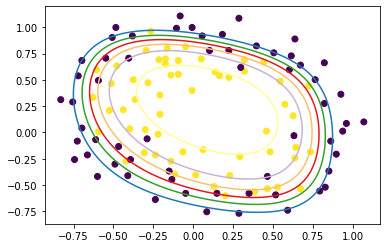

In [53]:
plot_boundary(lrl2_grad, df2_features.values, labels_series.values, grid_step=.01)
plt.scatter(df2['результат первого теста'].values, 
            df2['результат второго теста'].values, 
            c=df2['результат прохождения контроля'].values)
plt.show()

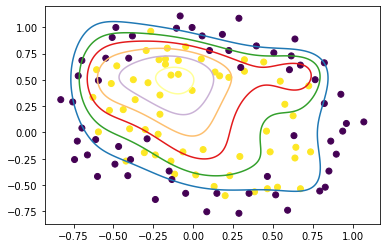

In [52]:
plot_boundary(lrl2_bfgs, df2_features.values, labels_series.values, grid_step=.01)
plt.scatter(df2['результат первого теста'].values, 
            df2['результат второго теста'].values, 
            c=df2['результат прохождения контроля'].values)
plt.show()

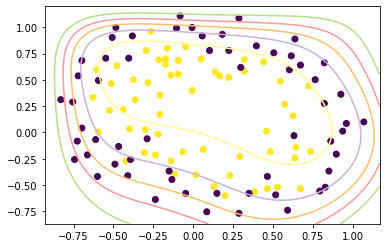

In [54]:
plot_boundary(lrl2_nm, df2_features.values, labels_series.values, grid_step=.01)
plt.scatter(df2['результат первого теста'].values, 
            df2['результат второго теста'].values, 
            c=df2['результат прохождения контроля'].values)
plt.show()

13) Попробуйте различные значения параметра регуляризации λ. Как выбор данного значения влияет на вид разделяющей 
кривой? Ответ дайте в виде графиков.

In [74]:
models2 = []

for lambda_ in [0.1, 0.001, 0.0001, 1e-5]:
    model = LogRegressionL2(lambda_=lambda_)
    print('lambda', lambda_)
    model.fit(scaled_combined_features, labels_series, optimizer='BFGS', verbosity=True)
    models2.append(model)
    print()

lambda 0.1
0.6931471805599454
0.4996275755009653

lambda 0.001
0.6931471805599454
0.31245165372832323

lambda 0.0001
0.6931471805599454
0.29104374443185965

lambda 1e-05
0.6931471805599454
0.27645071411246336



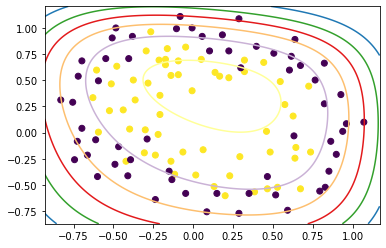

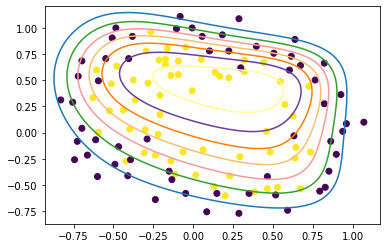

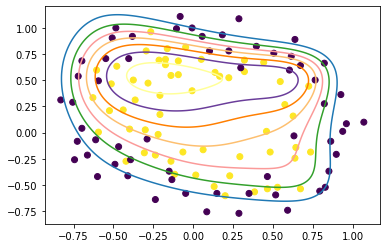

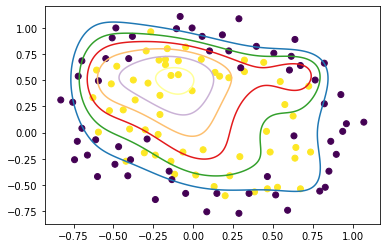

In [75]:
for model in models2:
    plot_boundary(model, df2_features.values, labels_series.values, grid_step=.005)
    plt.scatter(df2['результат первого теста'].values, 
                df2['результат второго теста'].values, 
                c=df2['результат прохождения контроля'].values)
    plt.show()

15) Загрузите данные ex2data3.mat из файла

In [80]:
from scipy.io import loadmat

data3 = loadmat(files_paths[2])
X, y = data3['X'], data3['y'].T[0]
X.shape, y.shape

((5000, 400), (5000,))

16) Визуализируйте несколько случайных изображений из набора данных. Визуализация должна содержать каждую цифру как минимум один раз.

In [84]:
X_images = X.reshape((X.shape[0], 20, 20))

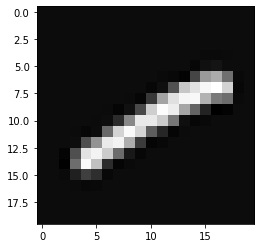

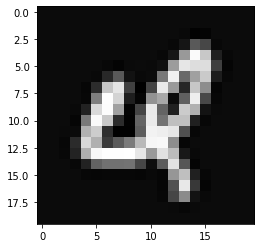

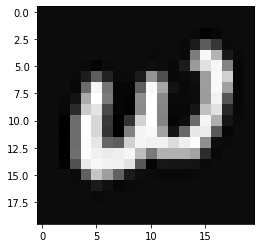

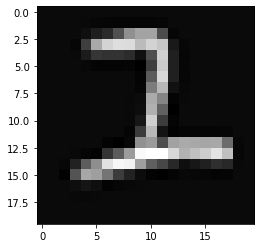

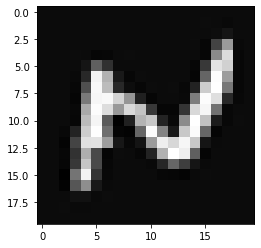

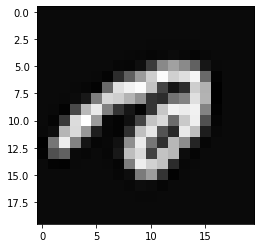

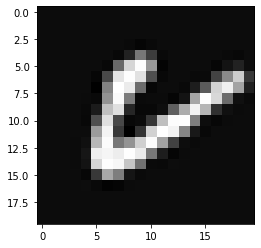

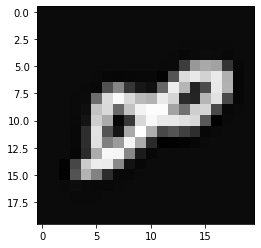

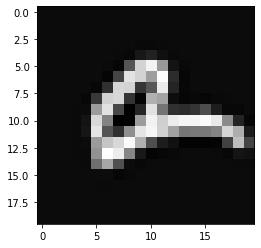

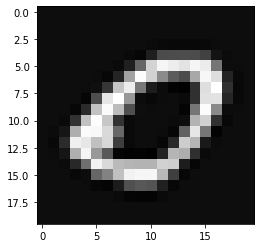

In [87]:
for class_ in np.unique(y):
    plt.imshow(X_images[y==class_][0], cmap='gray')
    plt.show()

19) Реализуйте многоклассовую классификацию по методу “один против всех”.

In [128]:
from tqdm import tqdm

class OneVsRestClassifier:
    def __init__(self, base_clf_initer):
        self._base_clf_initer = base_clf_initer
        self.models = {}
    
    def fit(self, X, y, optimizer='grad', verbosity=False, max_iters=None):
        iter_ = tqdm(np.unique(y)) if verbosity else np.unique(y)
        for class_ in iter_:
            model = self._base_clf_initer()
            class_y = y.copy()
            class_y[y == class_] = 1
            class_y[y != class_] = 0
            model.fit(X, class_y, optimizer=optimizer, verbosity=verbosity, max_iters=max_iters)
            self.models[class_] = model
            print()
    
    def predict(self, X):
        classes = []
        probas = []
        for class_, model in self.models.items():
            classes.append(class_)
            prediction = model.predict(X)
            probas.append(prediction)
        classes_probas = np.vstack(probas)
        return np.array(classes)[np.argmax(classes_probas, axis=0)]

def foo():
    return LogRegressionL2(lr=0.01, lambda_=0.005)

multi_clf = OneVsRestClassifier(base_clf_initer=foo)
multi_clf.fit(X, y, optimizer='grad', max_iters=400, verbosity=True) # BFGS Nelder-Mead , verbosity=True


























  0%|          | 0/10 [00:00<?, ?it/s]

0.6931471805599454
(1, 0.5360954149313719)
(2, 0.4459550797344493)
(3, 0.3907356635261724)
(4, 0.354469718582729)
(5, 0.3291861648422742)
(6, 0.31067268127012565)
(7, 0.2965568328619776)
(8, 0.28542363060089887)
(9, 0.27638694730830593)
(10, 0.26886862251063437)
(11, 0.26247817783531113)
(12, 0.2569440590542281)
(13, 0.25207263335139407)
(14, 0.24772282117039204)
(15, 0.24378988880702415)
(16, 0.24019479793855758)
(17, 0.23687703086417092)
(18, 0.23378964960532242)
(19, 0.23089582593713076)
(20, 0.2281663612421862)
(21, 0.22557788558227493)
(22, 0.2231115311585472)
(23, 0.22075194245791177)
(24, 0.21848652887361636)
(25, 0.2163048943010567)
(26, 0.21419839749743727)
(27, 0.21215981015761345)
(28, 0.2101830487752632)
(29, 0.20826296275873385)
(30, 0.20639516582080614)
(31, 0.20457590093414163)
(32, 0.2028019315237188)
(33, 0.20107045331548545)
(34, 0.19937902255668957)
(35, 0.1977254972932616)
(36, 0.19610798912146798)
(37, 0.19452482338767305)
(38, 0.1929745062365487)
(39, 0.1914556972

(311, 0.08807524942286493)
(312, 0.08799005583128675)
(313, 0.08790537306242929)
(314, 0.0878211967395392)
(315, 0.08773752253533634)
(316, 0.08765434617131923)
(317, 0.08757166341708196)
(318, 0.08748947008964274)
(319, 0.08740776205278343)
(320, 0.08732653521640013)
(321, 0.0872457855358644)
(322, 0.0871655090113951)
(323, 0.08708570168744054)
(324, 0.08700635965207076)
(325, 0.0869274790363798)
(326, 0.08684905601389763)
(327, 0.08677108680001175)
(328, 0.08669356765139816)
(329, 0.0866164948654615)
(330, 0.08653986477978431)
(331, 0.0864636737715851)
(332, 0.08638791825718517)
(333, 0.08631259469148399)
(334, 0.08623769956744282)
(335, 0.08616322941557694)
(336, 0.08608918080345543)
(337, 0.08601555033520936)
(338, 0.08594233465104753)
(339, 0.08586953042677986)
(340, 0.08579713437334835)
(341, 0.08572514323636546)
(342, 0.08565355379565955)
(343, 0.08558236286482754)
(344, 0.08551156729079461)
(345, 0.08544116395338065)
(346, 0.08537114976487338)
(347, 0.08530152166960826)
(348, 0


























 10%|█         | 1/10 [00:43<06:34, 43.84s/it]

(400, 0.08209380980761291)
0.08209380980761291

0.6931471805599454
(1, 0.5623114880413832)
(2, 0.4872030897062192)
(3, 0.4415349592844232)
(4, 0.4119564269957267)
(5, 0.39168810822168615)
(6, 0.37711274191725874)
(7, 0.3661872248953708)
(8, 0.3576958377118471)
(9, 0.35088199811942217)
(10, 0.3452566521696183)
(11, 0.3404933866143799)
(12, 0.33636834716560565)
(13, 0.3327244222290901)
(14, 0.32944913394942393)
(15, 0.32646056731627765)
(16, 0.32369817141458035)
(17, 0.32111660175939155)
(18, 0.3186815109849783)
(19, 0.3163666172202419)
(20, 0.3141516280224983)
(21, 0.3120207480738722)
(22, 0.30996159200733564)
(23, 0.3079643827493997)
(24, 0.30602135391442686)
(25, 0.30412629989920636)
(26, 0.3022742341397638)
(27, 0.30046112742417125)
(28, 0.29868370603955796)
(29, 0.2969392950415469)
(30, 0.29522569583238956)
(31, 0.29354109002322115)
(32, 0.29188396357277435)
(33, 0.2902530466678296)
(34, 0.2886472658963147)
(35, 0.2870657060710517)
(36, 0.28550757966701834)
(37, 0.2839722022917509)


(311, 0.15947718604860067)
(312, 0.15935660819708633)
(313, 0.15923669301173027)
(314, 0.1591174351460739)
(315, 0.15899882931140014)
(316, 0.15888087027595524)
(317, 0.15876355286418284)
(318, 0.15864687195597071)
(319, 0.1585308224859094)
(320, 0.15841539944256228)
(321, 0.15830059786774783)
(322, 0.15818641285583235)
(323, 0.15807283955303492)
(324, 0.15795987315674237)
(325, 0.15784750891483557)
(326, 0.15773574212502603)
(327, 0.15762456813420275)
(328, 0.15751398233778988)
(329, 0.15740398017911333)
(330, 0.15729455714877827)
(331, 0.15718570878405544)
(332, 0.15707743066827753)
(333, 0.15696971843024457)
(334, 0.15686256774363835)
(335, 0.1567559743264462)
(336, 0.15664993394039317)
(337, 0.1565444423903832)
(338, 0.15643949552394856)
(339, 0.15633508923070794)
(340, 0.1562312194418323)
(341, 0.1561278821295194)
(342, 0.15602507330647566)
(343, 0.15592278902540627)
(344, 0.15582102537851264)
(345, 0.15571977849699767)
(346, 0.15561904455057812)
(347, 0.15551881974700446)
(348, 0


























 20%|██        | 2/10 [01:27<05:49, 43.67s/it]

(399, 0.1509260334623268)
(400, 0.15084821397603296)
0.15084821397603296



0.6931471805599454
(1, 0.5627571517185634)
(2, 0.4878150815892217)
(3, 0.4421800794359049)
(4, 0.41256813744896326)
(5, 0.39223003107336313)
(6, 0.37756340480323747)
(7, 0.36653332810431943)
(8, 0.3579290002277896)
(9, 0.35099703332460475)
(10, 0.34525057519244834)
(11, 0.34036480074667363)
(12, 0.3361170412277025)
(13, 0.33235109286419884)
(14, 0.32895518597523643)
(15, 0.3258479651386913)
(16, 0.3229693251873512)
(17, 0.320274278006501)
(18, 0.317728760965533)
(19, 0.3153067185039537)
(20, 0.3129880361346226)
(21, 0.3107570559794727)
(22, 0.3086014958173562)
(23, 0.3065116524525722)
(24, 0.3044798082350185)
(25, 0.30249978459212523)
(26, 0.30056660318806117)
(27, 0.2986762267169667)
(28, 0.29682535919259556)
(29, 0.29501129108603724)
(30, 0.29323177854612065)
(31, 0.2914849487151078)
(32, 0.28976922516092984)
(33, 0.2880832689139611)
(34, 0.28642593167728747)
(35, 0.28479621858297743)
(36, 0.2831932584690357)
(37, 0.2816162801064186)
(38, 0.2800645931512761)
(39, 0.2785375728623021)


(313, 0.16081956177001067)
(314, 0.16070701787279085)
(315, 0.16059508012095255)
(316, 0.16048374364085985)
(317, 0.16037300361198364)
(318, 0.16026285526617504)
(319, 0.16015329388695093)
(320, 0.16004431480879078)
(321, 0.15993591341644506)
(322, 0.15982808514425462)
(323, 0.1597208254754813)
(324, 0.15961412994164903)
(325, 0.15950799412189584)
(326, 0.15940241364233598)
(327, 0.15929738417543224)
(328, 0.1591929014393784)
(329, 0.15908896119749144)
(330, 0.15898555925761335)
(331, 0.15888269147152234)
(332, 0.15878035373435362)
(333, 0.15867854198402884)
(334, 0.1585772522006949)
(335, 0.15847648040617143)
(336, 0.15837622266340676)
(337, 0.15827647507594247)
(338, 0.1581772337873862)
(339, 0.15807849498089305)
(340, 0.15798025487865425)
(341, 0.15788250974139423)
(342, 0.1577852558678755)
(343, 0.15768848959441084)
(344, 0.15759220729438309)
(345, 0.15749640537777243)
(346, 0.15740108029069044)
(347, 0.15730622851492185)
(348, 0.15721184656747286)
(349, 0.15711793100012614)
(350, 


























 30%|███       | 3/10 [02:08<05:01, 43.13s/it]

0.15287552400561755

0.6931471805599454
(1, 0.5530071642342602)
(2, 0.47259270624636895)
(3, 0.42359985325928085)
(4, 0.39174236736330714)
(5, 0.36980963345741186)
(6, 0.3539669943481908)
(7, 0.3420501114808914)
(8, 0.3327694422881947)
(9, 0.32532015347275617)
(10, 0.3191798527012228)
(11, 0.31399807071183206)
(12, 0.3095329932036784)
(13, 0.3056137318246962)
(14, 0.30211700823623305)
(15, 0.2989522887365977)
(16, 0.29605204347979386)
(17, 0.2933652075492285)
(18, 0.2908526963567802)
(19, 0.2884842707008627)
(20, 0.2862363075595788)
(21, 0.2840901904408013)
(22, 0.2820311309201158)
(23, 0.2800472950114558)
(24, 0.27812914814084483)
(25, 0.27626895894302606)
(26, 0.2744604198344444)
(27, 0.27269835439359824)
(28, 0.27097848992477686)
(29, 0.26929727942466947)
(30, 0.26765176131409596)
(31, 0.26603944826815346)
(32, 0.264458238631742)
(33, 0.262906345484331)
(34, 0.26138223958326834)
(35, 0.2598846032838804)
(36, 0.25841229318785425)
(37, 0.2569643097663035)
(38, 0.25553977258161326)
(39

(313, 0.14028207418577315)
(314, 0.14016630765261406)
(315, 0.1400511589915991)
(316, 0.1399366233581002)
(317, 0.13982269595846963)
(318, 0.13970937204936787)
(319, 0.13959664693710233)
(320, 0.13948451597697625)
(321, 0.13937297457264802)
(322, 0.13926201817550038)
(323, 0.13915164228401916)
(324, 0.1390418424431825)
(325, 0.1389326142438584)
(326, 0.1388239533222127)
(327, 0.13871585535912542)
(328, 0.13860831607961643)
(329, 0.13850133125227973)
(330, 0.13839489668872682)
(331, 0.13828900824303797)
(332, 0.13818366181122238)
(333, 0.1380788533306862)
(334, 0.13797457877970887)
(335, 0.1378708341769272)
(336, 0.13776761558082737)
(337, 0.13766491908924436)
(338, 0.13756274083886946)
(339, 0.13746107700476423)
(340, 0.13735992379988274)
(341, 0.1372592774746002)
(342, 0.13715913431624893)
(343, 0.13705949064866124)
(344, 0.13696034283171885)
(345, 0.13686168726090928)
(346, 0.13676352036688855)
(347, 0.13666583861505033)
(348, 0.1365686385051016)
(349, 0.13647191657064428)
(350, 0.13


























 40%|████      | 4/10 [02:48<04:11, 41.96s/it]

(400, 0.13210139594458628)
0.13210139594458628

0.6931471805599454
(1, 0.556538885996212)
(2, 0.47847369037028054)
(3, 0.43126207851584497)
(4, 0.40089561483332203)
(5, 0.38028555978129824)
(6, 0.3656555435606432)
(7, 0.3548722691369198)
(8, 0.3466644304965682)
(9, 0.3402388116956148)
(10, 0.33508091024541675)
(11, 0.33084588903761436)
(12, 0.3272961136135777)
(13, 0.32426389428936947)
(14, 0.32162846170446663)
(15, 0.31930129054953704)
(16, 0.3172164864815304)
(17, 0.3153243363842854)
(18, 0.3135868878542136)
(19, 0.31197486142793995)
(20, 0.31046545680725707)
(21, 0.3090407702882864)
(22, 0.3076866373018741)
(23, 0.3063917752794247)
(24, 0.3051471417211236)
(25, 0.30394544848222677)
(26, 0.30278079081368275)
(27, 0.30164836162180264)
(28, 0.30054422965048355)
(29, 0.29946516605608087)
(30, 0.2984085079313041)
(31, 0.2973720502634813)
(32, 0.29635395993448826)
(33, 0.2953527069223243)
(34, 0.2943670090110873)
(35, 0.29339578717049164)
(36, 0.2924381294078712)
(37, 0.2914932613814176)


(311, 0.191087101322878)
(312, 0.19094665243515227)
(313, 0.1908068459227026)
(314, 0.1906676775486744)
(315, 0.19052914311347569)
(316, 0.19039123845436456)
(317, 0.19025395944504195)
(318, 0.19011730199525032)
(319, 0.18998126205037702)
(320, 0.1898458355910635)
(321, 0.1897110186328194)
(322, 0.1895768072256419)
(323, 0.18944319745363994)
(324, 0.1893101854346635)
(325, 0.18917776731993788)
(326, 0.18904593929370236)
(327, 0.188914697572854)
(328, 0.18878403840659608)
(329, 0.18865395807609087)
(330, 0.18852445289411687)
(331, 0.18839551920473085)
(332, 0.1882671533829341)
(333, 0.18813935183434288)
(334, 0.18801211099486295)
(335, 0.18788542733036892)
(336, 0.1877592973363872)
(337, 0.18763371753778274)
(338, 0.18750868448845073)
(339, 0.18738419477101126)
(340, 0.18726024499650817)
(341, 0.1871368318041121)
(342, 0.18701395186082662)
(343, 0.18689160186119877)
(344, 0.18676977852703258)
(345, 0.18664847860710665)
(346, 0.18652769887689527)
(347, 0.18640743613829258)
(348, 0.186287


























 50%|█████     | 5/10 [03:28<03:27, 41.46s/it]

(399, 0.18079493324988521)
(400, 0.18069809927286803)
0.18069809927286803



0.6931471805599454
(1, 0.5593568726125525)
(2, 0.482229562452671)
(3, 0.43502375164681484)
(4, 0.4041724645160418)
(5, 0.3827933145345076)
(6, 0.36721561648860385)
(7, 0.3553658450506658)
(8, 0.3460095107152771)
(9, 0.33837768401133894)
(10, 0.3319727716057969)
(11, 0.3264622189961556)
(12, 0.3216176175165572)
(13, 0.31727839447163664)
(14, 0.3133293893348737)
(15, 0.3096865738256328)
(16, 0.3062877095766891)
(17, 0.3030860889306479)
(18, 0.3000462520080145)
(19, 0.2971410005428738)
(20, 0.2943492806553977)
(21, 0.29165465898147724)
(22, 0.289044210953038)
(23, 0.2865076998267101)
(24, 0.2840369637266239)
(25, 0.28162545343323764)
(26, 0.27926788070691044)
(27, 0.2769599485378829)
(28, 0.27469814272101795)
(29, 0.2724795697523045)
(30, 0.2703018300072964)
(31, 0.2681629179992905)
(32, 0.2660611435684851)
(33, 0.263995069354156)
(34, 0.2619634610089782)
(35, 0.2599652474384495)
(36, 0.25799948896641856)
(37, 0.2560653517949786)
(38, 0.2541620874827959)
(39, 0.2522890164387406)
(40, 0.25

(314, 0.11445772838296062)
(315, 0.11434298756717715)
(316, 0.11422892882616219)
(317, 0.11411554635455802)
(318, 0.11400283441195766)
(319, 0.11389078732200611)
(320, 0.11377939947151673)
(321, 0.11366866530960167)
(322, 0.11355857934681692)
(323, 0.11344913615432092)
(324, 0.11334033036304703)
(325, 0.11323215666288916)
(326, 0.11312460980190099)
(327, 0.11301768458550758)
(328, 0.1129113758757301)
(329, 0.11280567859042258)
(330, 0.11270058770252123)
(331, 0.1125960982393055)
(332, 0.11249220528167103)
(333, 0.1123889039634141)
(334, 0.11228618947052729)
(335, 0.11218405704050659)
(336, 0.11208250196166898)
(337, 0.1119815195724813)
(338, 0.111881105260899)
(339, 0.11178125446371576)
(340, 0.1116819626659231)
(341, 0.11158322540007981)
(342, 0.11148503824569134)
(343, 0.11138739682859888)
(344, 0.11129029682037758)
(345, 0.11119373393774443)
(346, 0.11109770394197492)
(347, 0.1110022026383289)
(348, 0.11090722587548506)
(349, 0.11081276954498415)
(350, 0.11071882958068063)
(351, 0.1


























 60%|██████    | 6/10 [04:10<02:46, 41.52s/it]

(400, 0.10660120805410116)
0.10660120805410116

0.6931471805599454
(1, 0.5507110805529374)
(2, 0.46889696751478177)
(3, 0.41893435076683033)
(4, 0.38632494236887516)
(5, 0.36376374155694197)
(6, 0.3473703565727637)
(7, 0.33495593404999635)
(8, 0.3252165455027548)
(9, 0.3173382622151709)
(10, 0.31079258959014094)
(11, 0.30522476850939184)
(12, 0.30038985627694204)
(13, 0.296114616256898)
(14, 0.2922739665546642)
(15, 0.28877596270605344)
(16, 0.2855519549900067)
(17, 0.2825499788581173)
(18, 0.2797302199451058)
(19, 0.277061842286118)
(20, 0.27452073158754436)
(21, 0.2720878646248992)
(22, 0.2697481145643357)
(23, 0.2674893645986645)
(24, 0.26530184279252594)
(25, 0.2631776177329304)
(26, 0.2611102124868056)
(27, 0.25909430656389115)
(28, 0.257125504012423)
(29, 0.25520015167879323)
(30, 0.2533151958489672)
(31, 0.25146806849274933)
(32, 0.2496565965097231)
(33, 0.24787892897072078)
(34, 0.24613347852793108)
(35, 0.24441887404633303)
(36, 0.24273392217064488)
(37, 0.24107757604336746)
(

(310, 0.11967818034041149)
(311, 0.11957677378151178)
(312, 0.11947598035822753)
(313, 0.11937579477754012)
(314, 0.1192762118061639)
(315, 0.11917722626971614)
(316, 0.11907883305190031)
(317, 0.11898102709370338)
(318, 0.11888380339260537)
(319, 0.11878715700180255)
(320, 0.1186910830294429)
(321, 0.11859557663787394)
(322, 0.1185006330429028)
(323, 0.11840624751306844)
(324, 0.11831241536892519)
(325, 0.11821913198233804)
(326, 0.1181263927757892)
(327, 0.11803419322169585)
(328, 0.11794252884173838)
(329, 0.11785139520619989)
(330, 0.1177607879333155)
(331, 0.11767070268863268)
(332, 0.11758113518438112)
(333, 0.11749208117885278)
(334, 0.11740353647579156)
(335, 0.11731549692379283)
(336, 0.11722795841571189)
(337, 0.11714091688808208)
(338, 0.11705436832054174)
(339, 0.11696830873527012)
(340, 0.1168827341964319)
(341, 0.11679764080963068)
(342, 0.1167130247213704)
(343, 0.11662888211852546)
(344, 0.11654520922781868)
(345, 0.11646200231530743)
(346, 0.11637925768587758)
(347, 0.


























 70%|███████   | 7/10 [04:50<02:03, 41.22s/it]

0.11250843498622953

0.6931471805599454
(1, 0.5701940080438435)
(2, 0.5000665593020586)
(3, 0.4579020619830536)
(4, 0.4310252581832884)
(5, 0.4129767731594776)
(6, 0.4003044693912639)
(7, 0.39105887049637983)
(8, 0.3840818503176175)
(9, 0.3786546472731754)
(10, 0.37431434874208513)
(11, 0.37075334743005045)
(12, 0.3677617497606722)
(13, 0.3651930695550217)
(14, 0.36294307936179004)
(15, 0.360936375471195)
(16, 0.3591176149991282)
(17, 0.3574456658388422)
(18, 0.35588962001963603)
(19, 0.3544260268124389)
(20, 0.35303694085311765)
(21, 0.3517085250143022)
(22, 0.35043003722131444)
(23, 0.3491930870357883)
(24, 0.3479910843937325)
(25, 0.3468188269255377)
(26, 0.3456721883580366)
(27, 0.3445478814099924)
(28, 0.34344327610503694)
(29, 0.34235625966657407)
(30, 0.34128512785908227)
(31, 0.340228500281885)
(32, 0.3391852540272007)
(33, 0.338154471502497)
(34, 0.33713539923753066)
(35, 0.33612741525273737)
(36, 0.33513000313058544)
(37, 0.3341427313566088)
(38, 0.3331652368188744)
(39, 0.33

(315, 0.22365818304161542)
(316, 0.22351263112449982)
(317, 0.2233677707903901)
(318, 0.22322359716224083)
(319, 0.223080105407925)
(320, 0.22293729073974003)
(321, 0.22279514841392065)
(322, 0.22265367373015726)
(323, 0.22251286203112014)
(324, 0.22237270870198983)
(325, 0.22223320916999317)
(326, 0.22209435890394474)
(327, 0.2219561534137942)
(328, 0.22181858825017914)
(329, 0.22168165900398318)
(330, 0.22154536130589975)
(331, 0.22140969082600087)
(332, 0.22127464327331153)
(333, 0.22114021439538883)
(334, 0.22100639997790678)
(335, 0.22087319584424567)
(336, 0.22074059785508654)
(337, 0.22060860190801077)
(338, 0.22047720393710432)
(339, 0.22034639991256683)
(340, 0.22021618584032546)
(341, 0.22008655776165348)
(342, 0.2199575117527931)
(343, 0.21982904392458352)
(344, 0.21970115042209265)
(345, 0.2195738274242541)
(346, 0.21944707114350795)
(347, 0.2193208778254458)
(348, 0.21919524374846067)
(349, 0.21907016522340073)
(350, 0.2189456385932267)
(351, 0.2188216602326745)
(352, 0.21


























 80%|████████  | 8/10 [05:30<01:21, 40.76s/it]

(399, 0.21345155628247892)
(400, 0.21335058289674214)
0.21335058289674214

0.6931471805599454
(1, 0.5588269052266879)
(2, 0.4820807409394915)
(3, 0.4356680973500912)
(4, 0.405801708484591)
(5, 0.38550548760931325)
(6, 0.3710654715588161)
(7, 0.3603858253856123)
(8, 0.3522192729567128)
(9, 0.3457888505719054)
(10, 0.3405915210054105)
(11, 0.3362908128481463)
(12, 0.3326553637988535)
(13, 0.32952229129251115)
(14, 0.3267745766825379)
(15, 0.32432666391374715)
(16, 0.32211503700705696)
(17, 0.32009190587793324)
(18, 0.31822088447508384)
(19, 0.3164739762712778)
(20, 0.3148294358873323)
(21, 0.3132702290958596)
(22, 0.3117829085611672)
(23, 0.310356782937278)
(24, 0.3089832959119093)
(25, 0.30765555744767237)
(26, 0.3063679866624325)
(27, 0.3051160374865373)
(28, 0.3038959863068761)
(29, 0.30270476645351646)
(30, 0.30153983838221665)
(31, 0.3003990872691463)
(32, 0.29928074180658637)
(33, 0.2981833095034945)
(34, 0.2971055249128186)
(35, 0.2960463080396013)
(36, 0.29500473080837025)
(37, 0

(312, 0.20124410717983837)
(313, 0.20112387068949597)
(314, 0.20100414644938128)
(315, 0.20088493100281277)
(316, 0.20076622092694663)
(317, 0.20064801283234227)
(318, 0.20053030336253347)
(319, 0.20041308919360742)
(320, 0.20029636703378922)
(321, 0.20018013362303375)
(322, 0.20006438573262325)
(323, 0.19994912016477143)
(324, 0.1998343337522336)
(325, 0.19972002335792288)
(326, 0.19960618587453216)
(327, 0.19949281822416196)
(328, 0.19937991735795393)
(329, 0.19926748025572996)
(330, 0.19915550392563677)
(331, 0.19904398540379586)
(332, 0.19893292175395894)
(333, 0.19882231006716797)
(334, 0.1987121474614212)
(335, 0.19860243108134357)
(336, 0.19849315809786217)
(337, 0.19838432570788683)
(338, 0.19827593113399494)
(339, 0.19816797162412148)
(340, 0.19806044445125348)
(341, 0.1979533469131287)
(342, 0.19784667633193928)
(343, 0.1977404300540392)
(344, 0.19763460544965658)
(345, 0.19752919991260953)
(346, 0.19742421086002696)
(347, 0.1973196357320728)
(348, 0.1972154719916745)
(349, 0


























 90%|█████████ | 9/10 [06:10<00:40, 40.57s/it]

(400, 0.19230977339208757)
0.19230977339208757

0.6931471805599454
(1, 0.5663233427484663)
(2, 0.49180048576244084)
(3, 0.4451285204076718)
(4, 0.41378743898454917)
(5, 0.3913661351258904)
(6, 0.3744249513717064)
(7, 0.36101586889734044)
(8, 0.3499792597693236)
(9, 0.340594436752305)
(10, 0.33239685269400154)
(11, 0.325077677079886)
(12, 0.31842614258593394)
(13, 0.3122951346977227)
(14, 0.3065799424316256)
(15, 0.3012047390465045)
(16, 0.296113752792956)
(17, 0.2912653666856357)
(18, 0.2866280952690828)
(19, 0.2821777922782655)
(20, 0.2778956823846744)
(21, 0.2737669550415887)
(22, 0.2697797482107324)
(23, 0.2659244066190363)
(24, 0.262192935941784)
(25, 0.2585785984936115)
(26, 0.25507561219820857)
(27, 0.25167892561714267)
(28, 0.24838404941702172)
(29, 0.24518692997265182)
(30, 0.24208385457570766)
(31, 0.23907138042701553)
(32, 0.23614628155850378)
(33, 0.2333055092763904)
(34, 0.2305461627895996)
(35, 0.22786546749019093)
(36, 0.22526075895824743)
(37, 0.22272947122361958)
(38, 0

(311, 0.09495827581383252)
(312, 0.09487199951187607)
(313, 0.09478621259979371)
(314, 0.09470091082318684)
(315, 0.09461608997829893)
(316, 0.09453174591125382)
(317, 0.09444787451730798)
(318, 0.09436447174011574)
(319, 0.09428153357100824)
(320, 0.09419905604828505)
(321, 0.0941170352565183)
(322, 0.09403546732586948)
(323, 0.09395434843141821)
(324, 0.0938736747925028)
(325, 0.09379344267207268)
(326, 0.09371364837605194)
(327, 0.09363428825271425)
(328, 0.09355535869206864)
(329, 0.09347685612525598)
(330, 0.09339877702395584)
(331, 0.09332111789980392)
(332, 0.0932438753038192)
(333, 0.09316704582584126)
(334, 0.09309062609397709)
(335, 0.09301461277405744)
(336, 0.09293900256910242)
(337, 0.0928637922187963)
(338, 0.09278897849897111)
(339, 0.09271455822109909)
(340, 0.0926405282317937)
(341, 0.09256688541231889)
(342, 0.09249362667810683)
(343, 0.09242074897828367)
(344, 0.09234824929520305)
(345, 0.09227612464398757)
(346, 0.09220437207207784)
(347, 0.0921329886587889)
(348, 0


























100%|██████████| 10/10 [06:52<00:00, 41.28s/it]

(400, 0.08881141912422158)
0.08881141912422158



21) Процент правильных классификаций на обучающей выборке должен составлять около 95%.

In [129]:
(y == predict(multi_clf, X)).mean()

(10, 5000)


0.8614

In [132]:
def foo():
    return LogRegressionL2(lr=0.05, lambda_=0.005)

multi_clf = OneVsRestClassifier(base_clf_initer=foo)
multi_clf.fit(X, y, optimizer='grad', max_iters=600, verbosity=True) # BFGS Nelder-Mead , verbosity=True


























  0%|          | 0/10 [00:00<?, ?it/s]

0.6931471805599454
(1, 0.5360954149313719)
(2, 0.4459550797344493)
(3, 0.3907356635261724)
(4, 0.354469718582729)
(5, 0.3291861648422742)
(6, 0.31067268127012565)
(7, 0.2965568328619776)
(8, 0.28542363060089887)
(9, 0.27638694730830593)
(10, 0.26886862251063437)
(11, 0.26247817783531113)
(12, 0.2569440590542281)
(13, 0.25207263335139407)
(14, 0.24772282117039204)
(15, 0.24378988880702415)
(16, 0.24019479793855758)
(17, 0.23687703086417092)
(18, 0.23378964960532242)
(19, 0.23089582593713076)
(20, 0.2281663612421862)
(21, 0.22557788558227493)
(22, 0.2231115311585472)
(23, 0.22075194245791177)
(24, 0.21848652887361636)
(25, 0.2163048943010567)
(26, 0.21419839749743727)
(27, 0.21215981015761345)
(28, 0.2101830487752632)
(29, 0.20826296275873385)
(30, 0.20639516582080614)
(31, 0.20457590093414163)
(32, 0.2028019315237188)
(33, 0.20107045331548545)
(34, 0.19937902255668957)
(35, 0.1977254972932616)
(36, 0.19610798912146798)
(37, 0.19452482338767305)
(38, 0.1929745062365487)
(39, 0.1914556972

(311, 0.08807524942286493)
(312, 0.08799005583128675)
(313, 0.08790537306242929)
(314, 0.0878211967395392)
(315, 0.08773752253533634)
(316, 0.08765434617131923)
(317, 0.08757166341708196)
(318, 0.08748947008964274)
(319, 0.08740776205278343)
(320, 0.08732653521640013)
(321, 0.0872457855358644)
(322, 0.0871655090113951)
(323, 0.08708570168744054)
(324, 0.08700635965207076)
(325, 0.0869274790363798)
(326, 0.08684905601389763)
(327, 0.08677108680001175)
(328, 0.08669356765139816)
(329, 0.0866164948654615)
(330, 0.08653986477978431)
(331, 0.0864636737715851)
(332, 0.08638791825718517)
(333, 0.08631259469148399)
(334, 0.08623769956744282)
(335, 0.08616322941557694)
(336, 0.08608918080345543)
(337, 0.08601555033520936)
(338, 0.08594233465104753)
(339, 0.08586953042677986)
(340, 0.08579713437334835)
(341, 0.08572514323636546)
(342, 0.08565355379565955)
(343, 0.08558236286482754)
(344, 0.08551156729079461)
(345, 0.08544116395338065)
(346, 0.08537114976487338)
(347, 0.08530152166960826)
(348, 0


























 10%|█         | 1/10 [00:59<08:55, 59.52s/it]

(599, 0.0751172485648356)
(600, 0.07509427192866884)
0.07509427192866884

0.6931471805599454
(1, 0.5623114880413832)
(2, 0.4872030897062192)
(3, 0.4415349592844232)
(4, 0.4119564269957267)
(5, 0.39168810822168615)
(6, 0.37711274191725874)
(7, 0.3661872248953708)
(8, 0.3576958377118471)
(9, 0.35088199811942217)
(10, 0.3452566521696183)
(11, 0.3404933866143799)
(12, 0.33636834716560565)
(13, 0.3327244222290901)
(14, 0.32944913394942393)
(15, 0.32646056731627765)
(16, 0.32369817141458035)
(17, 0.32111660175939155)
(18, 0.3186815109849783)
(19, 0.3163666172202419)
(20, 0.3141516280224983)
(21, 0.3120207480738722)
(22, 0.30996159200733564)
(23, 0.3079643827493997)
(24, 0.30602135391442686)
(25, 0.30412629989920636)
(26, 0.3022742341397638)
(27, 0.30046112742417125)
(28, 0.29868370603955796)
(29, 0.2969392950415469)
(30, 0.29522569583238956)
(31, 0.29354109002322115)
(32, 0.29188396357277435)
(33, 0.2902530466678296)
(34, 0.2886472658963147)
(35, 0.2870657060710517)
(36, 0.28550757966701834)

(312, 0.15935660819708633)
(313, 0.15923669301173027)
(314, 0.1591174351460739)
(315, 0.15899882931140014)
(316, 0.15888087027595524)
(317, 0.15876355286418284)
(318, 0.15864687195597071)
(319, 0.1585308224859094)
(320, 0.15841539944256228)
(321, 0.15830059786774783)
(322, 0.15818641285583235)
(323, 0.15807283955303492)
(324, 0.15795987315674237)
(325, 0.15784750891483557)
(326, 0.15773574212502603)
(327, 0.15762456813420275)
(328, 0.15751398233778988)
(329, 0.15740398017911333)
(330, 0.15729455714877827)
(331, 0.15718570878405544)
(332, 0.15707743066827753)
(333, 0.15696971843024457)
(334, 0.15686256774363835)
(335, 0.1567559743264462)
(336, 0.15664993394039317)
(337, 0.1565444423903832)
(338, 0.15643949552394856)
(339, 0.15633508923070794)
(340, 0.1562312194418323)
(341, 0.1561278821295194)
(342, 0.15602507330647566)
(343, 0.15592278902540627)
(344, 0.15582102537851264)
(345, 0.15571977849699767)
(346, 0.15561904455057812)
(347, 0.15551881974700446)
(348, 0.15541910033158784)
(349, 0


























 20%|██        | 2/10 [01:57<07:52, 59.12s/it]

0.1401993797759739

0.6931471805599454
(1, 0.5627571517185634)
(2, 0.4878150815892217)
(3, 0.4421800794359049)
(4, 0.41256813744896326)
(5, 0.39223003107336313)
(6, 0.37756340480323747)
(7, 0.36653332810431943)
(8, 0.3579290002277896)
(9, 0.35099703332460475)
(10, 0.34525057519244834)
(11, 0.34036480074667363)
(12, 0.3361170412277025)
(13, 0.33235109286419884)
(14, 0.32895518597523643)
(15, 0.3258479651386913)
(16, 0.3229693251873512)
(17, 0.320274278006501)
(18, 0.317728760965533)
(19, 0.3153067185039537)
(20, 0.3129880361346226)
(21, 0.3107570559794727)
(22, 0.3086014958173562)
(23, 0.3065116524525722)
(24, 0.3044798082350185)
(25, 0.30249978459212523)
(26, 0.30056660318806117)
(27, 0.2986762267169667)
(28, 0.29682535919259556)
(29, 0.29501129108603724)
(30, 0.29323177854612065)
(31, 0.2914849487151078)
(32, 0.28976922516092984)
(33, 0.2880832689139611)
(34, 0.28642593167728747)
(35, 0.28479621858297743)
(36, 0.2831932584690357)
(37, 0.2816162801064186)
(38, 0.2800645931512761)
(39, 

(311, 0.1610464877651172)
(312, 0.16093271674009363)
(313, 0.16081956177001067)
(314, 0.16070701787279085)
(315, 0.16059508012095255)
(316, 0.16048374364085985)
(317, 0.16037300361198364)
(318, 0.16026285526617504)
(319, 0.16015329388695093)
(320, 0.16004431480879078)
(321, 0.15993591341644506)
(322, 0.15982808514425462)
(323, 0.1597208254754813)
(324, 0.15961412994164903)
(325, 0.15950799412189584)
(326, 0.15940241364233598)
(327, 0.15929738417543224)
(328, 0.1591929014393784)
(329, 0.15908896119749144)
(330, 0.15898555925761335)
(331, 0.15888269147152234)
(332, 0.15878035373435362)
(333, 0.15867854198402884)
(334, 0.1585772522006949)
(335, 0.15847648040617143)
(336, 0.15837622266340676)
(337, 0.15827647507594247)
(338, 0.1581772337873862)
(339, 0.15807849498089305)
(340, 0.15798025487865425)
(341, 0.15788250974139423)
(342, 0.1577852558678755)
(343, 0.15768848959441084)
(344, 0.15759220729438309)
(345, 0.15749640537777243)
(346, 0.15740108029069044)
(347, 0.15730622851492185)
(348, 0


























 30%|███       | 3/10 [02:55<06:51, 58.84s/it]

(599, 0.14270335461368716)
(600, 0.14266824578314793)
0.14266824578314793

0.6931471805599454
(1, 0.5530071642342602)
(2, 0.47259270624636895)
(3, 0.42359985325928085)
(4, 0.39174236736330714)
(5, 0.36980963345741186)
(6, 0.3539669943481908)
(7, 0.3420501114808914)
(8, 0.3327694422881947)
(9, 0.32532015347275617)
(10, 0.3191798527012228)
(11, 0.31399807071183206)
(12, 0.3095329932036784)
(13, 0.3056137318246962)
(14, 0.30211700823623305)
(15, 0.2989522887365977)
(16, 0.29605204347979386)
(17, 0.2933652075492285)
(18, 0.2908526963567802)
(19, 0.2884842707008627)
(20, 0.2862363075595788)
(21, 0.2840901904408013)
(22, 0.2820311309201158)
(23, 0.2800472950114558)
(24, 0.27812914814084483)
(25, 0.27626895894302606)
(26, 0.2744604198344444)
(27, 0.27269835439359824)
(28, 0.27097848992477686)
(29, 0.26929727942466947)
(30, 0.26765176131409596)
(31, 0.26603944826815346)
(32, 0.264458238631742)
(33, 0.262906345484331)
(34, 0.26138223958326834)
(35, 0.2598846032838804)
(36, 0.25841229318785425)


(311, 0.14051548050604412)
(312, 0.14039846348736731)
(313, 0.14028207418577315)
(314, 0.14016630765261406)
(315, 0.1400511589915991)
(316, 0.1399366233581002)
(317, 0.13982269595846963)
(318, 0.13970937204936787)
(319, 0.13959664693710233)
(320, 0.13948451597697625)
(321, 0.13937297457264802)
(322, 0.13926201817550038)
(323, 0.13915164228401916)
(324, 0.1390418424431825)
(325, 0.1389326142438584)
(326, 0.1388239533222127)
(327, 0.13871585535912542)
(328, 0.13860831607961643)
(329, 0.13850133125227973)
(330, 0.13839489668872682)
(331, 0.13828900824303797)
(332, 0.13818366181122238)
(333, 0.1380788533306862)
(334, 0.13797457877970887)
(335, 0.1378708341769272)
(336, 0.13776761558082737)
(337, 0.13766491908924436)
(338, 0.13756274083886946)
(339, 0.13746107700476423)
(340, 0.13735992379988274)
(341, 0.1372592774746002)
(342, 0.13715913431624893)
(343, 0.13705949064866124)
(344, 0.13696034283171885)
(345, 0.13686168726090928)
(346, 0.13676352036688855)
(347, 0.13666583861505033)
(348, 0.1


























 40%|████      | 4/10 [03:54<05:51, 58.66s/it]

(599, 0.12163643393296736)
(600, 0.12160041950870383)
0.12160041950870383

0.6931471805599454
(1, 0.556538885996212)
(2, 0.47847369037028054)
(3, 0.43126207851584497)
(4, 0.40089561483332203)
(5, 0.38028555978129824)
(6, 0.3656555435606432)
(7, 0.3548722691369198)
(8, 0.3466644304965682)
(9, 0.3402388116956148)
(10, 0.33508091024541675)
(11, 0.33084588903761436)
(12, 0.3272961136135777)
(13, 0.32426389428936947)
(14, 0.32162846170446663)
(15, 0.31930129054953704)
(16, 0.3172164864815304)
(17, 0.3153243363842854)
(18, 0.3135868878542136)
(19, 0.31197486142793995)
(20, 0.31046545680725707)
(21, 0.3090407702882864)
(22, 0.3076866373018741)
(23, 0.3063917752794247)
(24, 0.3051471417211236)
(25, 0.30394544848222677)
(26, 0.30278079081368275)
(27, 0.30164836162180264)
(28, 0.30054422965048355)
(29, 0.29946516605608087)
(30, 0.2984085079313041)
(31, 0.2973720502634813)
(32, 0.29635395993448826)
(33, 0.2953527069223243)
(34, 0.2943670090110873)
(35, 0.29339578717049164)
(36, 0.2924381294078712

(310, 0.1912281968604153)
(311, 0.191087101322878)
(312, 0.19094665243515227)
(313, 0.1908068459227026)
(314, 0.1906676775486744)
(315, 0.19052914311347569)
(316, 0.19039123845436456)
(317, 0.19025395944504195)
(318, 0.19011730199525032)
(319, 0.18998126205037702)
(320, 0.1898458355910635)
(321, 0.1897110186328194)
(322, 0.1895768072256419)
(323, 0.18944319745363994)
(324, 0.1893101854346635)
(325, 0.18917776731993788)
(326, 0.18904593929370236)
(327, 0.188914697572854)
(328, 0.18878403840659608)
(329, 0.18865395807609087)
(330, 0.18852445289411687)
(331, 0.18839551920473085)
(332, 0.1882671533829341)
(333, 0.18813935183434288)
(334, 0.18801211099486295)
(335, 0.18788542733036892)
(336, 0.1877592973363872)
(337, 0.18763371753778274)
(338, 0.18750868448845073)
(339, 0.18738419477101126)
(340, 0.18726024499650817)
(341, 0.1871368318041121)
(342, 0.18701395186082662)
(343, 0.18689160186119877)
(344, 0.18676977852703258)
(345, 0.18664847860710665)
(346, 0.18652769887689527)
(347, 0.1864074


























 50%|█████     | 5/10 [04:52<04:53, 58.67s/it]

0.1668701194630649

0.6931471805599454
(1, 0.5593568726125525)
(2, 0.482229562452671)
(3, 0.43502375164681484)
(4, 0.4041724645160418)
(5, 0.3827933145345076)
(6, 0.36721561648860385)
(7, 0.3553658450506658)
(8, 0.3460095107152771)
(9, 0.33837768401133894)
(10, 0.3319727716057969)
(11, 0.3264622189961556)
(12, 0.3216176175165572)
(13, 0.31727839447163664)
(14, 0.3133293893348737)
(15, 0.3096865738256328)
(16, 0.3062877095766891)
(17, 0.3030860889306479)
(18, 0.3000462520080145)
(19, 0.2971410005428738)
(20, 0.2943492806553977)
(21, 0.29165465898147724)
(22, 0.289044210953038)
(23, 0.2865076998267101)
(24, 0.2840369637266239)
(25, 0.28162545343323764)
(26, 0.27926788070691044)
(27, 0.2769599485378829)
(28, 0.27469814272101795)
(29, 0.2724795697523045)
(30, 0.2703018300072964)
(31, 0.2681629179992905)
(32, 0.2660611435684851)
(33, 0.263995069354156)
(34, 0.2619634610089782)
(35, 0.2599652474384495)
(36, 0.25799948896641856)
(37, 0.2560653517949786)
(38, 0.2541620874827959)
(39, 0.2522890

(311, 0.11480610232604971)
(312, 0.11468927979051328)
(313, 0.11457315714473437)
(314, 0.11445772838296062)
(315, 0.11434298756717715)
(316, 0.11422892882616219)
(317, 0.11411554635455802)
(318, 0.11400283441195766)
(319, 0.11389078732200611)
(320, 0.11377939947151673)
(321, 0.11366866530960167)
(322, 0.11355857934681692)
(323, 0.11344913615432092)
(324, 0.11334033036304703)
(325, 0.11323215666288916)
(326, 0.11312460980190099)
(327, 0.11301768458550758)
(328, 0.1129113758757301)
(329, 0.11280567859042258)
(330, 0.11270058770252123)
(331, 0.1125960982393055)
(332, 0.11249220528167103)
(333, 0.1123889039634141)
(334, 0.11228618947052729)
(335, 0.11218405704050659)
(336, 0.11208250196166898)
(337, 0.1119815195724813)
(338, 0.111881105260899)
(339, 0.11178125446371576)
(340, 0.1116819626659231)
(341, 0.11158322540007981)
(342, 0.11148503824569134)
(343, 0.11138739682859888)
(344, 0.11129029682037758)
(345, 0.11119373393774443)
(346, 0.11109770394197492)
(347, 0.1110022026383289)
(348, 0.1


























 60%|██████    | 6/10 [05:51<03:54, 58.68s/it]

0.09697193184214471

0.6931471805599454
(1, 0.5507110805529374)
(2, 0.46889696751478177)
(3, 0.41893435076683033)
(4, 0.38632494236887516)
(5, 0.36376374155694197)
(6, 0.3473703565727637)
(7, 0.33495593404999635)
(8, 0.3252165455027548)
(9, 0.3173382622151709)
(10, 0.31079258959014094)
(11, 0.30522476850939184)
(12, 0.30038985627694204)
(13, 0.296114616256898)
(14, 0.2922739665546642)
(15, 0.28877596270605344)
(16, 0.2855519549900067)
(17, 0.2825499788581173)
(18, 0.2797302199451058)
(19, 0.277061842286118)
(20, 0.27452073158754436)
(21, 0.2720878646248992)
(22, 0.2697481145643357)
(23, 0.2674893645986645)
(24, 0.26530184279252594)
(25, 0.2631776177329304)
(26, 0.2611102124868056)
(27, 0.25909430656389115)
(28, 0.257125504012423)
(29, 0.25520015167879323)
(30, 0.2533151958489672)
(31, 0.25146806849274933)
(32, 0.2496565965097231)
(33, 0.24787892897072078)
(34, 0.24613347852793108)
(35, 0.24441887404633303)
(36, 0.24273392217064488)
(37, 0.24107757604336746)
(38, 0.23944890977232772)
(3

(312, 0.11947598035822753)
(313, 0.11937579477754012)
(314, 0.1192762118061639)
(315, 0.11917722626971614)
(316, 0.11907883305190031)
(317, 0.11898102709370338)
(318, 0.11888380339260537)
(319, 0.11878715700180255)
(320, 0.1186910830294429)
(321, 0.11859557663787394)
(322, 0.1185006330429028)
(323, 0.11840624751306844)
(324, 0.11831241536892519)
(325, 0.11821913198233804)
(326, 0.1181263927757892)
(327, 0.11803419322169585)
(328, 0.11794252884173838)
(329, 0.11785139520619989)
(330, 0.1177607879333155)
(331, 0.11767070268863268)
(332, 0.11758113518438112)
(333, 0.11749208117885278)
(334, 0.11740353647579156)
(335, 0.11731549692379283)
(336, 0.11722795841571189)
(337, 0.11714091688808208)
(338, 0.11705436832054174)
(339, 0.11696830873527012)
(340, 0.1168827341964319)
(341, 0.11679764080963068)
(342, 0.1167130247213704)
(343, 0.11662888211852546)
(344, 0.11654520922781868)
(345, 0.11646200231530743)
(346, 0.11637925768587758)
(347, 0.11629697168274512)
(348, 0.11621514068696537)
(349, 0.


























 70%|███████   | 7/10 [06:50<02:56, 58.75s/it]

(600, 0.10424135754357891)
0.10424135754357891

0.6931471805599454
(1, 0.5701940080438435)
(2, 0.5000665593020586)
(3, 0.4579020619830536)
(4, 0.4310252581832884)
(5, 0.4129767731594776)
(6, 0.4003044693912639)
(7, 0.39105887049637983)
(8, 0.3840818503176175)
(9, 0.3786546472731754)
(10, 0.37431434874208513)
(11, 0.37075334743005045)
(12, 0.3677617497606722)
(13, 0.3651930695550217)
(14, 0.36294307936179004)
(15, 0.360936375471195)
(16, 0.3591176149991282)
(17, 0.3574456658388422)
(18, 0.35588962001963603)
(19, 0.3544260268124389)
(20, 0.35303694085311765)
(21, 0.3517085250143022)
(22, 0.35043003722131444)
(23, 0.3491930870357883)
(24, 0.3479910843937325)
(25, 0.3468188269255377)
(26, 0.3456721883580366)
(27, 0.3445478814099924)
(28, 0.34344327610503694)
(29, 0.34235625966657407)
(30, 0.34128512785908227)
(31, 0.340228500281885)
(32, 0.3391852540272007)
(33, 0.338154471502497)
(34, 0.33713539923753066)
(35, 0.33612741525273737)
(36, 0.33513000313058544)
(37, 0.3341427313566088)
(38, 0.

(314, 0.22380443146420004)
(315, 0.22365818304161542)
(316, 0.22351263112449982)
(317, 0.2233677707903901)
(318, 0.22322359716224083)
(319, 0.223080105407925)
(320, 0.22293729073974003)
(321, 0.22279514841392065)
(322, 0.22265367373015726)
(323, 0.22251286203112014)
(324, 0.22237270870198983)
(325, 0.22223320916999317)
(326, 0.22209435890394474)
(327, 0.2219561534137942)
(328, 0.22181858825017914)
(329, 0.22168165900398318)
(330, 0.22154536130589975)
(331, 0.22140969082600087)
(332, 0.22127464327331153)
(333, 0.22114021439538883)
(334, 0.22100639997790678)
(335, 0.22087319584424567)
(336, 0.22074059785508654)
(337, 0.22060860190801077)
(338, 0.22047720393710432)
(339, 0.22034639991256683)
(340, 0.22021618584032546)
(341, 0.22008655776165348)
(342, 0.2199575117527931)
(343, 0.21982904392458352)
(344, 0.21970115042209265)
(345, 0.2195738274242541)
(346, 0.21944707114350795)
(347, 0.2193208778254458)
(348, 0.21919524374846067)
(349, 0.21907016522340073)
(350, 0.2189456385932267)
(351, 0.2


























 80%|████████  | 8/10 [07:47<01:56, 58.17s/it]

(599, 0.1989988656862445)
(600, 0.1989474152488834)
0.1989474152488834

0.6931471805599454
(1, 0.5588269052266879)
(2, 0.4820807409394915)
(3, 0.4356680973500912)
(4, 0.405801708484591)
(5, 0.38550548760931325)
(6, 0.3710654715588161)
(7, 0.3603858253856123)
(8, 0.3522192729567128)
(9, 0.3457888505719054)
(10, 0.3405915210054105)
(11, 0.3362908128481463)
(12, 0.3326553637988535)
(13, 0.32952229129251115)
(14, 0.3267745766825379)
(15, 0.32432666391374715)
(16, 0.32211503700705696)
(17, 0.32009190587793324)
(18, 0.31822088447508384)
(19, 0.3164739762712778)
(20, 0.3148294358873323)
(21, 0.3132702290958596)
(22, 0.3117829085611672)
(23, 0.310356782937278)
(24, 0.3089832959119093)
(25, 0.30765555744767237)
(26, 0.3063679866624325)
(27, 0.3051160374865373)
(28, 0.3038959863068761)
(29, 0.30270476645351646)
(30, 0.30153983838221665)
(31, 0.3003990872691463)
(32, 0.29928074180658637)
(33, 0.2981833095034945)
(34, 0.2971055249128186)
(35, 0.2960463080396013)
(36, 0.29500473080837025)
(37, 0.29

(311, 0.2013648594113702)
(312, 0.20124410717983837)
(313, 0.20112387068949597)
(314, 0.20100414644938128)
(315, 0.20088493100281277)
(316, 0.20076622092694663)
(317, 0.20064801283234227)
(318, 0.20053030336253347)
(319, 0.20041308919360742)
(320, 0.20029636703378922)
(321, 0.20018013362303375)
(322, 0.20006438573262325)
(323, 0.19994912016477143)
(324, 0.1998343337522336)
(325, 0.19972002335792288)
(326, 0.19960618587453216)
(327, 0.19949281822416196)
(328, 0.19937991735795393)
(329, 0.19926748025572996)
(330, 0.19915550392563677)
(331, 0.19904398540379586)
(332, 0.19893292175395894)
(333, 0.19882231006716797)
(334, 0.1987121474614212)
(335, 0.19860243108134357)
(336, 0.19849315809786217)
(337, 0.19838432570788683)
(338, 0.19827593113399494)
(339, 0.19816797162412148)
(340, 0.19806044445125348)
(341, 0.1979533469131287)
(342, 0.19784667633193928)
(343, 0.1977404300540392)
(344, 0.19763460544965658)
(345, 0.19752919991260953)
(346, 0.19742421086002696)
(347, 0.1973196357320728)
(348, 0


























 90%|█████████ | 9/10 [08:46<00:58, 58.55s/it]

(600, 0.1796794839125272)
0.1796794839125272

0.6931471805599454
(1, 0.5663233427484663)
(2, 0.49180048576244084)
(3, 0.4451285204076718)
(4, 0.41378743898454917)
(5, 0.3913661351258904)
(6, 0.3744249513717064)
(7, 0.36101586889734044)
(8, 0.3499792597693236)
(9, 0.340594436752305)
(10, 0.33239685269400154)
(11, 0.325077677079886)
(12, 0.31842614258593394)
(13, 0.3122951346977227)
(14, 0.3065799424316256)
(15, 0.3012047390465045)
(16, 0.296113752792956)
(17, 0.2912653666856357)
(18, 0.2866280952690828)
(19, 0.2821777922782655)
(20, 0.2778956823846744)
(21, 0.2737669550415887)
(22, 0.2697797482107324)
(23, 0.2659244066190363)
(24, 0.262192935941784)
(25, 0.2585785984936115)
(26, 0.25507561219820857)
(27, 0.25167892561714267)
(28, 0.24838404941702172)
(29, 0.24518692997265182)
(30, 0.24208385457570766)
(31, 0.23907138042701553)
(32, 0.23614628155850378)
(33, 0.2333055092763904)
(34, 0.2305461627895996)
(35, 0.22786546749019093)
(36, 0.22526075895824743)
(37, 0.22272947122361958)
(38, 0.2

(312, 0.09487199951187607)
(313, 0.09478621259979371)
(314, 0.09470091082318684)
(315, 0.09461608997829893)
(316, 0.09453174591125382)
(317, 0.09444787451730798)
(318, 0.09436447174011574)
(319, 0.09428153357100824)
(320, 0.09419905604828505)
(321, 0.0941170352565183)
(322, 0.09403546732586948)
(323, 0.09395434843141821)
(324, 0.0938736747925028)
(325, 0.09379344267207268)
(326, 0.09371364837605194)
(327, 0.09363428825271425)
(328, 0.09355535869206864)
(329, 0.09347685612525598)
(330, 0.09339877702395584)
(331, 0.09332111789980392)
(332, 0.0932438753038192)
(333, 0.09316704582584126)
(334, 0.09309062609397709)
(335, 0.09301461277405744)
(336, 0.09293900256910242)
(337, 0.0928637922187963)
(338, 0.09278897849897111)
(339, 0.09271455822109909)
(340, 0.0926405282317937)
(341, 0.09256688541231889)
(342, 0.09249362667810683)
(343, 0.09242074897828367)
(344, 0.09234824929520305)
(345, 0.09227612464398757)
(346, 0.09220437207207784)
(347, 0.0921329886587889)
(348, 0.09206197151487411)
(349, 0


























100%|██████████| 10/10 [09:45<00:00, 58.53s/it]

0.08121472796010192



In [133]:
(y == predict(multi_clf, X)).mean()

(10, 5000)


0.8724

In [134]:
def foo():
    return LogRegressionL2(lr=0.05, lambda_=0.005)

multi_clf = OneVsRestClassifier(base_clf_initer=foo)
multi_clf.fit(X, y, optimizer='grad', max_iters=1000, verbosity=True) 


























  0%|          | 0/10 [00:00<?, ?it/s]

0.6931471805599454
(1, 0.5360954149313719)
(2, 0.4459550797344493)
(3, 0.3907356635261724)
(4, 0.354469718582729)
(5, 0.3291861648422742)
(6, 0.31067268127012565)
(7, 0.2965568328619776)
(8, 0.28542363060089887)
(9, 0.27638694730830593)
(10, 0.26886862251063437)
(11, 0.26247817783531113)
(12, 0.2569440590542281)
(13, 0.25207263335139407)
(14, 0.24772282117039204)
(15, 0.24378988880702415)
(16, 0.24019479793855758)
(17, 0.23687703086417092)
(18, 0.23378964960532242)
(19, 0.23089582593713076)
(20, 0.2281663612421862)
(21, 0.22557788558227493)
(22, 0.2231115311585472)
(23, 0.22075194245791177)
(24, 0.21848652887361636)
(25, 0.2163048943010567)
(26, 0.21419839749743727)
(27, 0.21215981015761345)
(28, 0.2101830487752632)
(29, 0.20826296275873385)
(30, 0.20639516582080614)
(31, 0.20457590093414163)
(32, 0.2028019315237188)
(33, 0.20107045331548545)
(34, 0.19937902255668957)
(35, 0.1977254972932616)
(36, 0.19610798912146798)
(37, 0.19452482338767305)
(38, 0.1929745062365487)
(39, 0.1914556972

(313, 0.08790537306242929)
(314, 0.0878211967395392)
(315, 0.08773752253533634)
(316, 0.08765434617131923)
(317, 0.08757166341708196)
(318, 0.08748947008964274)
(319, 0.08740776205278343)
(320, 0.08732653521640013)
(321, 0.0872457855358644)
(322, 0.0871655090113951)
(323, 0.08708570168744054)
(324, 0.08700635965207076)
(325, 0.0869274790363798)
(326, 0.08684905601389763)
(327, 0.08677108680001175)
(328, 0.08669356765139816)
(329, 0.0866164948654615)
(330, 0.08653986477978431)
(331, 0.0864636737715851)
(332, 0.08638791825718517)
(333, 0.08631259469148399)
(334, 0.08623769956744282)
(335, 0.08616322941557694)
(336, 0.08608918080345543)
(337, 0.08601555033520936)
(338, 0.08594233465104753)
(339, 0.08586953042677986)
(340, 0.08579713437334835)
(341, 0.08572514323636546)
(342, 0.08565355379565955)
(343, 0.08558236286482754)
(344, 0.08551156729079461)
(345, 0.08544116395338065)
(346, 0.08537114976487338)
(347, 0.08530152166960826)
(348, 0.08523227664355472)
(349, 0.08516341169390887)
(350, 0

(619, 0.07467284654994125)
(620, 0.0746514363806059)
(621, 0.074630100686778)
(622, 0.07460883911833292)
(623, 0.0745876513272769)
(624, 0.07456653696773094)
(625, 0.0745454956959148)
(626, 0.0745245271701314)
(627, 0.07450363105075095)
(628, 0.0744828070001955)
(629, 0.07446205468292362)
(630, 0.07444137376541506)
(631, 0.0744207639161557)
(632, 0.07440022480562258)
(633, 0.0743797561062691)
(634, 0.07435935749251013)
(635, 0.07433902864070775)
(636, 0.07431876922915653)
(637, 0.07429857893806938)
(638, 0.07427845744956321)
(639, 0.07425840444764507)
(640, 0.07423841961819805)
(641, 0.07421850264896748)
(642, 0.07419865322954734)
(643, 0.0741788710513666)
(644, 0.07415915580767575)
(645, 0.07413950719353357)
(646, 0.07411992490579378)
(647, 0.07410040864309204)
(648, 0.07408095810583293)
(649, 0.07406157299617697)
(650, 0.07404225301802815)
(651, 0.07402299787702091)
(652, 0.07400380728050783)
(653, 0.07398468093754716)
(654, 0.07396561855889047)
(655, 0.0739466198569704)
(656, 0.0739

(927, 0.07044780522582005)
(928, 0.0704392554178645)
(929, 0.07043072770635503)
(930, 0.0704222220172897)
(931, 0.0704137382769789)
(932, 0.07040527641204367)
(933, 0.0703968363494141)
(934, 0.07038841801632786)
(935, 0.07038002134032843)
(936, 0.07037164624926362)
(937, 0.07036329267128404)
(938, 0.07035496053484142)
(939, 0.0703466497686872)
(940, 0.07033836030187085)
(941, 0.07033009206373853)
(942, 0.07032184498393132)
(943, 0.07031361899238395)
(944, 0.07030541401932314)
(945, 0.07029722999526616)
(946, 0.0702890668510194)
(947, 0.07028092451767677)
(948, 0.07027280292661837)
(949, 0.07026470200950893)
(950, 0.07025662169829643)
(951, 0.07024856192521058)
(952, 0.07024052262276152)
(953, 0.07023250372373831)
(954, 0.07022450516120747)
(955, 0.07021652686851171)
(956, 0.07020856877926841)
(957, 0.07020063082736831)
(958, 0.07019271294697411)
(959, 0.07018481507251906)
(960, 0.07017693713870567)
(961, 0.07016907908050427)
(962, 0.07016124083315176)
(963, 0.0701534223321502)
(964, 0.


























 10%|█         | 1/10 [01:36<14:30, 96.69s/it]

(999, 0.06988458422711234)
(1000, 0.06987745330602649)
0.06987745330602649

0.6931471805599454
(1, 0.5623114880413832)
(2, 0.4872030897062192)
(3, 0.4415349592844232)
(4, 0.4119564269957267)
(5, 0.39168810822168615)
(6, 0.37711274191725874)
(7, 0.3661872248953708)
(8, 0.3576958377118471)
(9, 0.35088199811942217)
(10, 0.3452566521696183)
(11, 0.3404933866143799)
(12, 0.33636834716560565)
(13, 0.3327244222290901)
(14, 0.32944913394942393)
(15, 0.32646056731627765)
(16, 0.32369817141458035)
(17, 0.32111660175939155)
(18, 0.3186815109849783)
(19, 0.3163666172202419)
(20, 0.3141516280224983)
(21, 0.3120207480738722)
(22, 0.30996159200733564)
(23, 0.3079643827493997)
(24, 0.30602135391442686)
(25, 0.30412629989920636)
(26, 0.3022742341397638)
(27, 0.30046112742417125)
(28, 0.29868370603955796)
(29, 0.2969392950415469)
(30, 0.29522569583238956)
(31, 0.29354109002322115)
(32, 0.29188396357277435)
(33, 0.2902530466678296)
(34, 0.2886472658963147)
(35, 0.2870657060710517)
(36, 0.2855075796670183

(312, 0.15935660819708633)
(313, 0.15923669301173027)
(314, 0.1591174351460739)
(315, 0.15899882931140014)
(316, 0.15888087027595524)
(317, 0.15876355286418284)
(318, 0.15864687195597071)
(319, 0.1585308224859094)
(320, 0.15841539944256228)
(321, 0.15830059786774783)
(322, 0.15818641285583235)
(323, 0.15807283955303492)
(324, 0.15795987315674237)
(325, 0.15784750891483557)
(326, 0.15773574212502603)
(327, 0.15762456813420275)
(328, 0.15751398233778988)
(329, 0.15740398017911333)
(330, 0.15729455714877827)
(331, 0.15718570878405544)
(332, 0.15707743066827753)
(333, 0.15696971843024457)
(334, 0.15686256774363835)
(335, 0.1567559743264462)
(336, 0.15664993394039317)
(337, 0.1565444423903832)
(338, 0.15643949552394856)
(339, 0.15633508923070794)
(340, 0.1562312194418323)
(341, 0.1561278821295194)
(342, 0.15602507330647566)
(343, 0.15592278902540627)
(344, 0.15582102537851264)
(345, 0.15571977849699767)
(346, 0.15561904455057812)
(347, 0.15551881974700446)
(348, 0.15541910033158784)
(349, 0

(620, 0.1394978205414216)
(621, 0.139463913765084)
(622, 0.13943011491895194)
(623, 0.13939642352700082)
(624, 0.13936283911596192)
(625, 0.13932936121530226)
(626, 0.13929598935720505)
(627, 0.13926272307654966)
(628, 0.13922956191089236)
(629, 0.139196505400447)
(630, 0.1391635530880656)
(631, 0.13913070451921966)
(632, 0.1390979592419811)
(633, 0.1390653168070038)
(634, 0.13903277676750486)
(635, 0.1390003386792465)
(636, 0.13896800210051763)
(637, 0.13893576659211607)
(638, 0.13890363171733044)
(639, 0.13887159704192267)
(640, 0.13883966213411025)
(641, 0.13880782656454882)
(642, 0.13877608990631518)
(643, 0.1387444517348897)
(644, 0.1387129116281398)
(645, 0.13868146916630278)
(646, 0.13865012393196943)
(647, 0.13861887551006724)
(648, 0.13858772348784412)
(649, 0.13855666745485215)
(650, 0.13852570700293138)
(651, 0.1384948417261939)
(652, 0.13846407122100796)
(653, 0.13843339508598235)
(654, 0.1384028129219505)
(655, 0.13837232433195557)
(656, 0.13834192892123448)
(657, 0.138311

(930, 0.13253555214281154)
(931, 0.1325209576717328)
(932, 0.13250639746921172)
(933, 0.1324918714275849)
(934, 0.1324773794396208)
(935, 0.13246292139851795)
(936, 0.13244849719790272)
(937, 0.13243410673182712)
(938, 0.13241974989476676)
(939, 0.13240542658161875)
(940, 0.1323911366876997)
(941, 0.13237688010874343)
(942, 0.1323626567408993)
(943, 0.13234846648072976)
(944, 0.13233430922520853)
(945, 0.13232018487171857)
(946, 0.13230609331805007)
(947, 0.13229203446239846)
(948, 0.13227800820336236)
(949, 0.13226401443994174)
(950, 0.13225005307153578)
(951, 0.1322361239979411)
(952, 0.13222222711934978)
(953, 0.13220836233634733)
(954, 0.13219452954991093)
(955, 0.13218072866140737)
(956, 0.13216695957259134)
(957, 0.13215322218560333)
(958, 0.13213951640296798)
(959, 0.13212584212759215)
(960, 0.132112199262763)
(961, 0.13209858771214614)
(962, 0.13208500737978393)
(963, 0.13207145817009372)
(964, 0.13205793998786566)
(965, 0.1320444527382614)
(966, 0.132030996326812)
(967, 0.1320


























 20%|██        | 2/10 [03:14<12:56, 97.09s/it]

(999, 0.13160363766926395)
(1000, 0.1315911760713619)
0.1315911760713619

0.6931471805599454
(1, 0.5627571517185634)
(2, 0.4878150815892217)
(3, 0.4421800794359049)
(4, 0.41256813744896326)
(5, 0.39223003107336313)
(6, 0.37756340480323747)
(7, 0.36653332810431943)
(8, 0.3579290002277896)
(9, 0.35099703332460475)
(10, 0.34525057519244834)
(11, 0.34036480074667363)
(12, 0.3361170412277025)
(13, 0.33235109286419884)
(14, 0.32895518597523643)
(15, 0.3258479651386913)
(16, 0.3229693251873512)
(17, 0.320274278006501)
(18, 0.317728760965533)
(19, 0.3153067185039537)
(20, 0.3129880361346226)
(21, 0.3107570559794727)
(22, 0.3086014958173562)
(23, 0.3065116524525722)
(24, 0.3044798082350185)
(25, 0.30249978459212523)
(26, 0.30056660318806117)
(27, 0.2986762267169667)
(28, 0.29682535919259556)
(29, 0.29501129108603724)
(30, 0.29323177854612065)
(31, 0.2914849487151078)
(32, 0.28976922516092984)
(33, 0.2880832689139611)
(34, 0.28642593167728747)
(35, 0.28479621858297743)
(36, 0.2831932584690357)
(

(309, 0.16127589818587193)
(310, 0.16116087988251895)
(311, 0.1610464877651172)
(312, 0.16093271674009363)
(313, 0.16081956177001067)
(314, 0.16070701787279085)
(315, 0.16059508012095255)
(316, 0.16048374364085985)
(317, 0.16037300361198364)
(318, 0.16026285526617504)
(319, 0.16015329388695093)
(320, 0.16004431480879078)
(321, 0.15993591341644506)
(322, 0.15982808514425462)
(323, 0.1597208254754813)
(324, 0.15961412994164903)
(325, 0.15950799412189584)
(326, 0.15940241364233598)
(327, 0.15929738417543224)
(328, 0.1591929014393784)
(329, 0.15908896119749144)
(330, 0.15898555925761335)
(331, 0.15888269147152234)
(332, 0.15878035373435362)
(333, 0.15867854198402884)
(334, 0.1585772522006949)
(335, 0.15847648040617143)
(336, 0.15837622266340676)
(337, 0.15827647507594247)
(338, 0.1581772337873862)
(339, 0.15807849498089305)
(340, 0.15798025487865425)
(341, 0.15788250974139423)
(342, 0.1577852558678755)
(343, 0.15768848959441084)
(344, 0.15759220729438309)
(345, 0.15749640537777243)
(346, 0

(617, 0.1420881486062754)
(618, 0.14205498348584342)
(619, 0.14202192189918825)
(620, 0.14198896339582487)
(621, 0.14195610752785776)
(622, 0.14192335384996185)
(623, 0.141890701919364)
(624, 0.14185815129582466)
(625, 0.14182570154161916)
(626, 0.1417933522215199)
(627, 0.14176110290277805)
(628, 0.14172895315510592)
(629, 0.14169690255065917)
(630, 0.1416649506640192)
(631, 0.14163309707217597)
(632, 0.14160134135451047)
(633, 0.14156968309277784)
(634, 0.1415381218710905)
(635, 0.14150665727590103)
(636, 0.14147528889598587)
(637, 0.14144401632242865)
(638, 0.14141283914860386)
(639, 0.14138175697016078)
(640, 0.14135076938500699)
(641, 0.14131987599329288)
(642, 0.14128907639739566)
(643, 0.14125837020190368)
(644, 0.14122775701360094)
(645, 0.14119723644145166)
(646, 0.14116680809658508)
(647, 0.1411364715922801)
(648, 0.14110622654395066)
(649, 0.14107607256913057)
(650, 0.1410460092874588)
(651, 0.14101603632066484)
(652, 0.14098615329255426)
(653, 0.14095635982899438)
(654, 0.1

(925, 0.1352568005002786)
(926, 0.1352422248776131)
(927, 0.1352276828804476)
(928, 0.13521317440446737)
(929, 0.13519869934577214)
(930, 0.1351842576008743)
(931, 0.13516984906669685)
(932, 0.13515547364057123)
(933, 0.13514113122023558)
(934, 0.13512682170383253)
(935, 0.13511254498990727)
(936, 0.13509830097740572)
(937, 0.1350840895656724)
(938, 0.13506991065444846)
(939, 0.13505576414387008)
(940, 0.13504164993446607)
(941, 0.13502756792715637)
(942, 0.13501351802324993)
(943, 0.13499950012444284)
(944, 0.1349855141328166)
(945, 0.13497155995083598)
(946, 0.13495763748134748)
(947, 0.13494374662757733)
(948, 0.1349298872931296)
(949, 0.13491605938198442)
(950, 0.13490226279849635)
(951, 0.1348884974473922)
(952, 0.13487476323376973)
(953, 0.13486106006309537)
(954, 0.1348473878412028)
(955, 0.134833746474291)
(956, 0.1348201358689227)
(957, 0.13480655593202237)
(958, 0.1347930065708747)
(959, 0.13477948769312278)
(960, 0.13476599920676655)
(961, 0.1347525410201608)
(962, 0.1347391


























 30%|███       | 3/10 [04:52<11:20, 97.23s/it]

0.13425036677886418

0.6931471805599454
(1, 0.5530071642342602)
(2, 0.47259270624636895)
(3, 0.42359985325928085)
(4, 0.39174236736330714)
(5, 0.36980963345741186)
(6, 0.3539669943481908)
(7, 0.3420501114808914)
(8, 0.3327694422881947)
(9, 0.32532015347275617)
(10, 0.3191798527012228)
(11, 0.31399807071183206)
(12, 0.3095329932036784)
(13, 0.3056137318246962)
(14, 0.30211700823623305)
(15, 0.2989522887365977)
(16, 0.29605204347979386)
(17, 0.2933652075492285)
(18, 0.2908526963567802)
(19, 0.2884842707008627)
(20, 0.2862363075595788)
(21, 0.2840901904408013)
(22, 0.2820311309201158)
(23, 0.2800472950114558)
(24, 0.27812914814084483)
(25, 0.27626895894302606)
(26, 0.2744604198344444)
(27, 0.27269835439359824)
(28, 0.27097848992477686)
(29, 0.26929727942466947)
(30, 0.26765176131409596)
(31, 0.26603944826815346)
(32, 0.264458238631742)
(33, 0.262906345484331)
(34, 0.26138223958326834)
(35, 0.2598846032838804)
(36, 0.25841229318785425)
(37, 0.2569643097663035)
(38, 0.25553977258161326)
(39

(311, 0.14051548050604412)
(312, 0.14039846348736731)
(313, 0.14028207418577315)
(314, 0.14016630765261406)
(315, 0.1400511589915991)
(316, 0.1399366233581002)
(317, 0.13982269595846963)
(318, 0.13970937204936787)
(319, 0.13959664693710233)
(320, 0.13948451597697625)
(321, 0.13937297457264802)
(322, 0.13926201817550038)
(323, 0.13915164228401916)
(324, 0.1390418424431825)
(325, 0.1389326142438584)
(326, 0.1388239533222127)
(327, 0.13871585535912542)
(328, 0.13860831607961643)
(329, 0.13850133125227973)
(330, 0.13839489668872682)
(331, 0.13828900824303797)
(332, 0.13818366181122238)
(333, 0.1380788533306862)
(334, 0.13797457877970887)
(335, 0.1378708341769272)
(336, 0.13776761558082737)
(337, 0.13766491908924436)
(338, 0.13756274083886946)
(339, 0.13746107700476423)
(340, 0.13735992379988274)
(341, 0.1372592774746002)
(342, 0.13715913431624893)
(343, 0.13705949064866124)
(344, 0.13696034283171885)
(345, 0.13686168726090928)
(346, 0.13676352036688855)
(347, 0.13666583861505033)
(348, 0.1

(619, 0.12093763608788008)
(620, 0.1209038493887071)
(621, 0.12087016901747719)
(622, 0.12083659451265828)
(623, 0.12080312541536053)
(624, 0.12076976126931711)
(625, 0.12073650162086556)
(626, 0.12070334601892892)
(627, 0.12067029401499742)
(628, 0.12063734516310995)
(629, 0.12060449901983594)
(630, 0.1205717551442573)
(631, 0.1205391130979506)
(632, 0.1205065724449692)
(633, 0.1204741327518258)
(634, 0.12044179358747492)
(635, 0.12040955452329571)
(636, 0.12037741513307469)
(637, 0.12034537499298889)
(638, 0.12031343368158906)
(639, 0.12028159077978262)
(640, 0.12024984587081758)
(641, 0.12021819854026577)
(642, 0.12018664837600673)
(643, 0.12015519496821155)
(644, 0.12012383790932674)
(645, 0.12009257679405864)
(646, 0.12006141121935736)
(647, 0.12003034078440135)
(648, 0.11999936509058196)
(649, 0.119968483741488)
(650, 0.11993769634289059)
(651, 0.11990700250272801)
(652, 0.11987640183109084)
(653, 0.119845893940207)
(654, 0.11981547844442715)
(655, 0.11978515496021001)
(656, 0.11

(926, 0.11402343898063708)
(927, 0.1140087298401723)
(928, 0.11399405543621548)
(929, 0.11397941566123032)
(930, 0.1139648104081071)
(931, 0.1139502395701606)
(932, 0.113935703041128)
(933, 0.11392120071516686)
(934, 0.11390673248685286)
(935, 0.113892298251178)
(936, 0.11387789790354844)
(937, 0.1138635313397824)
(938, 0.11384919845610827)
(939, 0.11383489914916255)
(940, 0.11382063331598775)
(941, 0.11380640085403068)
(942, 0.11379220166114017)
(943, 0.1137780356355653)
(944, 0.11376390267595342)
(945, 0.11374980268134818)
(946, 0.11373573555118757)
(947, 0.11372170118530216)
(948, 0.113707699483913)
(949, 0.11369373034762983)
(950, 0.11367979367744928)
(951, 0.11366588937475283)
(952, 0.11365201734130505)
(953, 0.11363817747925173)
(954, 0.11362436969111811)
(955, 0.11361059387980685)
(956, 0.1135968499485965)
(957, 0.11358313780113956)
(958, 0.1135694573414605)
(959, 0.1135558084739543)
(960, 0.11354219110338454)
(961, 0.11352860513488153)
(962, 0.11351505047394071)
(963, 0.1135015


























 40%|████      | 4/10 [06:29<09:42, 97.15s/it]

0.11302227409465132

0.6931471805599454
(1, 0.556538885996212)
(2, 0.47847369037028054)
(3, 0.43126207851584497)
(4, 0.40089561483332203)
(5, 0.38028555978129824)
(6, 0.3656555435606432)
(7, 0.3548722691369198)
(8, 0.3466644304965682)
(9, 0.3402388116956148)
(10, 0.33508091024541675)
(11, 0.33084588903761436)
(12, 0.3272961136135777)
(13, 0.32426389428936947)
(14, 0.32162846170446663)
(15, 0.31930129054953704)
(16, 0.3172164864815304)
(17, 0.3153243363842854)
(18, 0.3135868878542136)
(19, 0.31197486142793995)
(20, 0.31046545680725707)
(21, 0.3090407702882864)
(22, 0.3076866373018741)
(23, 0.3063917752794247)
(24, 0.3051471417211236)
(25, 0.30394544848222677)
(26, 0.30278079081368275)
(27, 0.30164836162180264)
(28, 0.30054422965048355)
(29, 0.29946516605608087)
(30, 0.2984085079313041)
(31, 0.2973720502634813)
(32, 0.29635395993448826)
(33, 0.2953527069223243)
(34, 0.2943670090110873)
(35, 0.29339578717049164)
(36, 0.2924381294078712)
(37, 0.2914932613814176)
(38, 0.2905605224338255)
(3

(312, 0.19094665243515227)
(313, 0.1908068459227026)
(314, 0.1906676775486744)
(315, 0.19052914311347569)
(316, 0.19039123845436456)
(317, 0.19025395944504195)
(318, 0.19011730199525032)
(319, 0.18998126205037702)
(320, 0.1898458355910635)
(321, 0.1897110186328194)
(322, 0.1895768072256419)
(323, 0.18944319745363994)
(324, 0.1893101854346635)
(325, 0.18917776731993788)
(326, 0.18904593929370236)
(327, 0.188914697572854)
(328, 0.18878403840659608)
(329, 0.18865395807609087)
(330, 0.18852445289411687)
(331, 0.18839551920473085)
(332, 0.1882671533829341)
(333, 0.18813935183434288)
(334, 0.18801211099486295)
(335, 0.18788542733036892)
(336, 0.1877592973363872)
(337, 0.18763371753778274)
(338, 0.18750868448845073)
(339, 0.18738419477101126)
(340, 0.18726024499650817)
(341, 0.1871368318041121)
(342, 0.18701395186082662)
(343, 0.18689160186119877)
(344, 0.18676977852703258)
(345, 0.18664847860710665)
(346, 0.18652769887689527)
(347, 0.18640743613829258)
(348, 0.18628768721934075)
(349, 0.1861

(621, 0.16587044206692428)
(622, 0.16582435320737096)
(623, 0.1657783978567544)
(624, 0.1657325754840524)
(625, 0.1656868855610056)
(626, 0.16564132756209932)
(627, 0.1655959009645458)
(628, 0.1655506052482669)
(629, 0.1655054398958761)
(630, 0.16546040439266158)
(631, 0.16541549822656876)
(632, 0.16537072088818328)
(633, 0.16532607187071402)
(634, 0.16528155066997635)
(635, 0.1652371567843752)
(636, 0.16519288971488885)
(637, 0.16514874896505213)
(638, 0.16510473404094037)
(639, 0.165060844451153)
(640, 0.16501707970679774)
(641, 0.1649734393214743)
(642, 0.16492992281125887)
(643, 0.16488652969468834)
(644, 0.1648432594927446)
(645, 0.16480011172883902)
(646, 0.16475708592879748)
(647, 0.16471418162084478)
(648, 0.16467139833558955)
(649, 0.16462873560600944)
(650, 0.1645861929674361)
(651, 0.16454376995754033)
(652, 0.16450146611631755)
(653, 0.16445928098607326)
(654, 0.16441721411140847)
(655, 0.16437526503920544)
(656, 0.1643334333186134)
(657, 0.1642917185010345)
(658, 0.1642501

(928, 0.15617603098657723)
(929, 0.15615477735146902)
(930, 0.15613357082133925)
(931, 0.1561124112587052)
(932, 0.15609129852659856)
(933, 0.15607023248856336)
(934, 0.15604921300865335)
(935, 0.15602823995142967)
(936, 0.15600731318195873)
(937, 0.1559864325658097)
(938, 0.15596559796905213)
(939, 0.15594480925825363)
(940, 0.15592406630047795)
(941, 0.15590336896328214)
(942, 0.15588271711471463)
(943, 0.1558621106233129)
(944, 0.15584154935810124)
(945, 0.15582103318858853)
(946, 0.15580056198476586)
(947, 0.15578013561710458)
(948, 0.15575975395655386)
(949, 0.15573941687453874)
(950, 0.15571912424295783)
(951, 0.15569887593418102)
(952, 0.15567867182104758)
(953, 0.1556585117768639)
(954, 0.1556383956754014)
(955, 0.15561832339089418)
(956, 0.1555982947980375)
(957, 0.155578309771985)
(958, 0.1555583681883471)
(959, 0.15553846992318865)
(960, 0.1555186148530271)
(961, 0.15549880285483028)
(962, 0.1554790338060145)
(963, 0.15545930758444232)
(964, 0.15543962406842088)
(965, 0.1554


























 50%|█████     | 5/10 [08:08<08:09, 97.86s/it]

(999, 0.1547766916330645)
(1000, 0.1547584680594066)
0.1547584680594066

0.6931471805599454
(1, 0.5593568726125525)
(2, 0.482229562452671)
(3, 0.43502375164681484)
(4, 0.4041724645160418)
(5, 0.3827933145345076)
(6, 0.36721561648860385)
(7, 0.3553658450506658)
(8, 0.3460095107152771)
(9, 0.33837768401133894)
(10, 0.3319727716057969)
(11, 0.3264622189961556)
(12, 0.3216176175165572)
(13, 0.31727839447163664)
(14, 0.3133293893348737)
(15, 0.3096865738256328)
(16, 0.3062877095766891)
(17, 0.3030860889306479)
(18, 0.3000462520080145)
(19, 0.2971410005428738)
(20, 0.2943492806553977)
(21, 0.29165465898147724)
(22, 0.289044210953038)
(23, 0.2865076998267101)
(24, 0.2840369637266239)
(25, 0.28162545343323764)
(26, 0.27926788070691044)
(27, 0.2769599485378829)
(28, 0.27469814272101795)
(29, 0.2724795697523045)
(30, 0.2703018300072964)
(31, 0.2681629179992905)
(32, 0.2660611435684851)
(33, 0.263995069354156)
(34, 0.2619634610089782)
(35, 0.2599652474384495)
(36, 0.25799948896641856)
(37, 0.2560

(312, 0.11468927979051328)
(313, 0.11457315714473437)
(314, 0.11445772838296062)
(315, 0.11434298756717715)
(316, 0.11422892882616219)
(317, 0.11411554635455802)
(318, 0.11400283441195766)
(319, 0.11389078732200611)
(320, 0.11377939947151673)
(321, 0.11366866530960167)
(322, 0.11355857934681692)
(323, 0.11344913615432092)
(324, 0.11334033036304703)
(325, 0.11323215666288916)
(326, 0.11312460980190099)
(327, 0.11301768458550758)
(328, 0.1129113758757301)
(329, 0.11280567859042258)
(330, 0.11270058770252123)
(331, 0.1125960982393055)
(332, 0.11249220528167103)
(333, 0.1123889039634141)
(334, 0.11228618947052729)
(335, 0.11218405704050659)
(336, 0.11208250196166898)
(337, 0.1119815195724813)
(338, 0.111881105260899)
(339, 0.11178125446371576)
(340, 0.1116819626659231)
(341, 0.11158322540007981)
(342, 0.11148503824569134)
(343, 0.11138739682859888)
(344, 0.11129029682037758)
(345, 0.11119373393774443)
(346, 0.11109770394197492)
(347, 0.1110022026383289)
(348, 0.11090722587548506)
(349, 0.1

(618, 0.09641925434158789)
(619, 0.09638955102862592)
(620, 0.09635994977324298)
(621, 0.09633045009490605)
(622, 0.09630105151602356)
(623, 0.09627175356192301)
(624, 0.09624255576082895)
(625, 0.09621345764384094)
(626, 0.09618445874491194)
(627, 0.09615555860082661)
(628, 0.0961267567511802)
(629, 0.09609805273835723)
(630, 0.09606944610751061)
(631, 0.09604093640654095)
(632, 0.0960125231860758)
(633, 0.09598420599944939)
(634, 0.09595598440268244)
(635, 0.095927857954462)
(636, 0.09589982621612181)
(637, 0.09587188875162236)
(638, 0.09584404512753163)
(639, 0.09581629491300556)
(640, 0.09578863767976915)
(641, 0.09576107300209714)
(642, 0.09573360045679552)
(643, 0.09570621962318267)
(644, 0.09567893008307089)
(645, 0.09565173142074823)
(646, 0.09562462322296007)
(647, 0.09559760507889145)
(648, 0.09557067658014884)
(649, 0.09554383732074274)
(650, 0.09551708689707009)
(651, 0.09549042490789673)
(652, 0.09546385095434037)
(653, 0.09543736463985338)
(654, 0.09541096557020591)
(655,

(925, 0.09053003194323861)
(926, 0.09051793271268843)
(927, 0.0905058639885462)
(928, 0.09049382566954776)
(929, 0.09048181765485779)
(930, 0.09046983984406745)
(931, 0.09045789213719237)
(932, 0.09044597443467026)
(933, 0.0904340866373588)
(934, 0.09042222864653351)
(935, 0.09041040036388548)
(936, 0.09039860169151921)
(937, 0.09038683253195062)
(938, 0.0903750927881048)
(939, 0.0903633823633138)
(940, 0.09035170116131484)
(941, 0.09034004908624796)
(942, 0.09032842604265391)
(943, 0.09031683193547235)
(944, 0.09030526667003957)
(945, 0.09029373015208661)
(946, 0.09028222228773701)
(947, 0.09027074298350507)
(948, 0.09025929214629365)
(949, 0.09024786968339234)
(950, 0.09023647550247534)
(951, 0.09022510951159957)
(952, 0.0902137716192027)
(953, 0.09020246173410124)
(954, 0.09019117976548859)
(955, 0.0901799256229331)
(956, 0.09016869921637624)
(957, 0.0901575004561306)
(958, 0.09014632925287808)
(959, 0.09013518551766803)
(960, 0.09012406916191536)
(961, 0.0901129800973987)
(962, 0.0


























 60%|██████    | 6/10 [09:47<06:31, 97.99s/it]

(999, 0.08971098215221074)
(1000, 0.08970089231394839)
0.08970089231394839

0.6931471805599454
(1, 0.5507110805529374)
(2, 0.46889696751478177)
(3, 0.41893435076683033)
(4, 0.38632494236887516)
(5, 0.36376374155694197)
(6, 0.3473703565727637)
(7, 0.33495593404999635)
(8, 0.3252165455027548)
(9, 0.3173382622151709)
(10, 0.31079258959014094)
(11, 0.30522476850939184)
(12, 0.30038985627694204)
(13, 0.296114616256898)
(14, 0.2922739665546642)
(15, 0.28877596270605344)
(16, 0.2855519549900067)
(17, 0.2825499788581173)
(18, 0.2797302199451058)
(19, 0.277061842286118)
(20, 0.27452073158754436)
(21, 0.2720878646248992)
(22, 0.2697481145643357)
(23, 0.2674893645986645)
(24, 0.26530184279252594)
(25, 0.2631776177329304)
(26, 0.2611102124868056)
(27, 0.25909430656389115)
(28, 0.257125504012423)
(29, 0.25520015167879323)
(30, 0.2533151958489672)
(31, 0.25146806849274933)
(32, 0.2496565965097231)
(33, 0.24787892897072078)
(34, 0.24613347852793108)
(35, 0.24441887404633303)
(36, 0.24273392217064488)

(310, 0.11967818034041149)
(311, 0.11957677378151178)
(312, 0.11947598035822753)
(313, 0.11937579477754012)
(314, 0.1192762118061639)
(315, 0.11917722626971614)
(316, 0.11907883305190031)
(317, 0.11898102709370338)
(318, 0.11888380339260537)
(319, 0.11878715700180255)
(320, 0.1186910830294429)
(321, 0.11859557663787394)
(322, 0.1185006330429028)
(323, 0.11840624751306844)
(324, 0.11831241536892519)
(325, 0.11821913198233804)
(326, 0.1181263927757892)
(327, 0.11803419322169585)
(328, 0.11794252884173838)
(329, 0.11785139520619989)
(330, 0.1177607879333155)
(331, 0.11767070268863268)
(332, 0.11758113518438112)
(333, 0.11749208117885278)
(334, 0.11740353647579156)
(335, 0.11731549692379283)
(336, 0.11722795841571189)
(337, 0.11714091688808208)
(338, 0.11705436832054174)
(339, 0.11696830873527012)
(340, 0.1168827341964319)
(341, 0.11679764080963068)
(342, 0.1167130247213704)
(343, 0.11662888211852546)
(344, 0.11654520922781868)
(345, 0.11646200231530743)
(346, 0.11637925768587758)
(347, 0.

(617, 0.10379287211904417)
(618, 0.10376730506122303)
(619, 0.10374182576384718)
(620, 0.10371643380878053)
(621, 0.10369112878046788)
(622, 0.10366591026591553)
(623, 0.10364077785467143)
(624, 0.10361573113880623)
(625, 0.10359076971289374)
(626, 0.10356589317399223)
(627, 0.10354110112162554)
(628, 0.10351639315776436)
(629, 0.10349176888680783)
(630, 0.10346722791556529)
(631, 0.10344276985323797)
(632, 0.10341839431140125)
(633, 0.1033941009039866)
(634, 0.10336988924726409)
(635, 0.10334575895982485)
(636, 0.10332170966256368)
(637, 0.10329774097866193)
(638, 0.10327385253357035)
(639, 0.10325004395499243)
(640, 0.10322631487286742)
(641, 0.10320266491935393)
(642, 0.10317909372881329)
(643, 0.10315560093779351)
(644, 0.10313218618501294)
(645, 0.10310884911134431)
(646, 0.10308558935979893)
(647, 0.1030624065755109)
(648, 0.1030393004057215)
(649, 0.10301627049976377)
(650, 0.10299331650904728)
(651, 0.10297043808704273)
(652, 0.10294763488926714)
(653, 0.1029249065732688)
(654,

(923, 0.098719782928754)
(924, 0.09870923537992077)
(925, 0.09869871379032659)
(926, 0.0986882180729115)
(927, 0.0986777481409894)
(928, 0.09866730390824589)
(929, 0.09865688528873648)
(930, 0.09864649219688468)
(931, 0.0986361245474799)
(932, 0.0986257822556757)
(933, 0.09861546523698776)
(934, 0.09860517340729212)
(935, 0.0985949066828232)
(936, 0.0985846649801719)
(937, 0.09857444821628387)
(938, 0.09856425630845755)
(939, 0.09855408917434241)
(940, 0.09854394673193709)
(941, 0.09853382889958752)
(942, 0.09852373559598533)
(943, 0.09851366674016578)
(944, 0.0985036222515062)
(945, 0.09849360204972415)
(946, 0.09848360605487563)
(947, 0.09847363418735335)
(948, 0.09846368636788505)
(949, 0.09845376251753168)
(950, 0.09844386255768578)
(951, 0.09843398641006976)
(952, 0.09842413399673401)
(953, 0.09841430524005564)
(954, 0.09840450006273638)
(955, 0.0983947183878011)
(956, 0.09838496013859623)
(957, 0.09837522523878796)
(958, 0.09836551361236073)
(959, 0.09835582518361552)
(960, 0.098


























 70%|███████   | 7/10 [11:26<04:54, 98.32s/it]

(1000, 0.0979776796900304)
0.0979776796900304

0.6931471805599454
(1, 0.5701940080438435)
(2, 0.5000665593020586)
(3, 0.4579020619830536)
(4, 0.4310252581832884)
(5, 0.4129767731594776)
(6, 0.4003044693912639)
(7, 0.39105887049637983)
(8, 0.3840818503176175)
(9, 0.3786546472731754)
(10, 0.37431434874208513)
(11, 0.37075334743005045)
(12, 0.3677617497606722)
(13, 0.3651930695550217)
(14, 0.36294307936179004)
(15, 0.360936375471195)
(16, 0.3591176149991282)
(17, 0.3574456658388422)
(18, 0.35588962001963603)
(19, 0.3544260268124389)
(20, 0.35303694085311765)
(21, 0.3517085250143022)
(22, 0.35043003722131444)
(23, 0.3491930870357883)
(24, 0.3479910843937325)
(25, 0.3468188269255377)
(26, 0.3456721883580366)
(27, 0.3445478814099924)
(28, 0.34344327610503694)
(29, 0.34235625966657407)
(30, 0.34128512785908227)
(31, 0.340228500281885)
(32, 0.3391852540272007)
(33, 0.338154471502497)
(34, 0.33713539923753066)
(35, 0.33612741525273737)
(36, 0.33513000313058544)
(37, 0.3341427313566088)
(38, 0.3

(313, 0.22395138136064072)
(314, 0.22380443146420004)
(315, 0.22365818304161542)
(316, 0.22351263112449982)
(317, 0.2233677707903901)
(318, 0.22322359716224083)
(319, 0.223080105407925)
(320, 0.22293729073974003)
(321, 0.22279514841392065)
(322, 0.22265367373015726)
(323, 0.22251286203112014)
(324, 0.22237270870198983)
(325, 0.22223320916999317)
(326, 0.22209435890394474)
(327, 0.2219561534137942)
(328, 0.22181858825017914)
(329, 0.22168165900398318)
(330, 0.22154536130589975)
(331, 0.22140969082600087)
(332, 0.22127464327331153)
(333, 0.22114021439538883)
(334, 0.22100639997790678)
(335, 0.22087319584424567)
(336, 0.22074059785508654)
(337, 0.22060860190801077)
(338, 0.22047720393710432)
(339, 0.22034639991256683)
(340, 0.22021618584032546)
(341, 0.22008655776165348)
(342, 0.2199575117527931)
(343, 0.21982904392458352)
(344, 0.21970115042209265)
(345, 0.2195738274242541)
(346, 0.21944707114350795)
(347, 0.2193208778254458)
(348, 0.21919524374846067)
(349, 0.21907016522340073)
(350, 0.

(621, 0.19790029448292976)
(622, 0.19785196958291731)
(623, 0.19780378014417996)
(624, 0.19775572561716592)
(625, 0.19770780545532635)
(626, 0.19766001911509481)
(627, 0.1976123660558666)
(628, 0.19756484573997832)
(629, 0.19751745763268755)
(630, 0.19747020120215317)
(631, 0.19742307591941474)
(632, 0.19737608125837347)
(633, 0.19732921669577222)
(634, 0.1972824817111762)
(635, 0.19723587578695367)
(636, 0.19718939840825694)
(637, 0.1971430490630032)
(638, 0.19709682724185612)
(639, 0.1970507324382067)
(640, 0.19700476414815515)
(641, 0.19695892187049252)
(642, 0.19691320510668248)
(643, 0.19686761336084305)
(644, 0.19682214613972907)
(645, 0.19677680295271435)
(646, 0.19673158331177387)
(647, 0.1966864867314665)
(648, 0.19664151272891783)
(649, 0.1965966608238025)
(650, 0.19655193053832787)
(651, 0.19650732139721627)
(652, 0.19646283292768915)
(653, 0.19641846465944954)
(654, 0.1963742161246664)
(655, 0.19633008685795758)
(656, 0.196286076396374)
(657, 0.19624218427938334)
(658, 0.19

(929, 0.18754809815825338)
(930, 0.18752494850512386)
(931, 0.18750184657581925)
(932, 0.1874787922339338)
(933, 0.18745578534357626)
(934, 0.18743282576936768)
(935, 0.18740991337643856)
(936, 0.1873870480304268)
(937, 0.18736422959747512)
(938, 0.18734145794422868)
(939, 0.18731873293783283)
(940, 0.18729605444593053)
(941, 0.18727342233666017)
(942, 0.1872508364786532)
(943, 0.18722829674103172)
(944, 0.18720580299340647)
(945, 0.18718335510587403)
(946, 0.18716095294901486)
(947, 0.1871385963938913)
(948, 0.18711628531204455)
(949, 0.1870940195754932)
(950, 0.1870717990567306)
(951, 0.1870496236287227)
(952, 0.1870274931649058)
(953, 0.1870054075391845)
(954, 0.1869833666259295)
(955, 0.18696137029997525)
(956, 0.186939418436618)
(957, 0.18691751091161352)
(958, 0.1868956476011751)
(959, 0.18687382838197125)
(960, 0.18685205313112382)
(961, 0.18683032172620564)
(962, 0.18680863404523868)
(963, 0.18678698996669188)
(964, 0.18676538936947892)
(965, 0.1867438321329566)
(966, 0.1867223


























 80%|████████  | 8/10 [13:05<03:17, 98.59s/it]

0.18601574024294476

0.6931471805599454
(1, 0.5588269052266879)
(2, 0.4820807409394915)
(3, 0.4356680973500912)
(4, 0.405801708484591)
(5, 0.38550548760931325)
(6, 0.3710654715588161)
(7, 0.3603858253856123)
(8, 0.3522192729567128)
(9, 0.3457888505719054)
(10, 0.3405915210054105)
(11, 0.3362908128481463)
(12, 0.3326553637988535)
(13, 0.32952229129251115)
(14, 0.3267745766825379)
(15, 0.32432666391374715)
(16, 0.32211503700705696)
(17, 0.32009190587793324)
(18, 0.31822088447508384)
(19, 0.3164739762712778)
(20, 0.3148294358873323)
(21, 0.3132702290958596)
(22, 0.3117829085611672)
(23, 0.310356782937278)
(24, 0.3089832959119093)
(25, 0.30765555744767237)
(26, 0.3063679866624325)
(27, 0.3051160374865373)
(28, 0.3038959863068761)
(29, 0.30270476645351646)
(30, 0.30153983838221665)
(31, 0.3003990872691463)
(32, 0.29928074180658637)
(33, 0.2981833095034945)
(34, 0.2971055249128186)
(35, 0.2960463080396013)
(36, 0.29500473080837025)
(37, 0.2939799899405109)
(38, 0.29297138495193176)
(39, 0.29

(315, 0.20088493100281277)
(316, 0.20076622092694663)
(317, 0.20064801283234227)
(318, 0.20053030336253347)
(319, 0.20041308919360742)
(320, 0.20029636703378922)
(321, 0.20018013362303375)
(322, 0.20006438573262325)
(323, 0.19994912016477143)
(324, 0.1998343337522336)
(325, 0.19972002335792288)
(326, 0.19960618587453216)
(327, 0.19949281822416196)
(328, 0.19937991735795393)
(329, 0.19926748025572996)
(330, 0.19915550392563677)
(331, 0.19904398540379586)
(332, 0.19893292175395894)
(333, 0.19882231006716797)
(334, 0.1987121474614212)
(335, 0.19860243108134357)
(336, 0.19849315809786217)
(337, 0.19838432570788683)
(338, 0.19827593113399494)
(339, 0.19816797162412148)
(340, 0.19806044445125348)
(341, 0.1979533469131287)
(342, 0.19784667633193928)
(343, 0.1977404300540392)
(344, 0.19763460544965658)
(345, 0.19752919991260953)
(346, 0.19742421086002696)
(347, 0.1973196357320728)
(348, 0.1972154719916745)
(349, 0.19711171712425524)
(350, 0.19700836863747054)
(351, 0.19690542406094794)
(352, 0

(625, 0.17855669884933173)
(626, 0.17851331348432062)
(627, 0.17847004168200786)
(628, 0.17842688303202664)
(629, 0.17838383712601963)
(630, 0.17834090355762605)
(631, 0.17829808192246893)
(632, 0.17825537181814238)
(633, 0.17821277284419926)
(634, 0.17817028460213818)
(635, 0.17812790669539172)
(636, 0.1780856387293137)
(637, 0.17804348031116737)
(638, 0.17800143105011296)
(639, 0.17795949055719598)
(640, 0.17791765844533516)
(641, 0.1778759343293107)
(642, 0.1778343178257527)
(643, 0.17779280855312946)
(644, 0.17775140613173568)
(645, 0.17771011018368152)
(646, 0.17766892033288093)
(647, 0.17762783620504055)
(648, 0.17758685742764838)
(649, 0.17754598362996296)
(650, 0.17750521444300207)
(651, 0.1774645494995322)
(652, 0.17742398843405732)
(653, 0.1773835308828085)
(654, 0.177343176483733)
(655, 0.17730292487648386)
(656, 0.17726277570240936)
(657, 0.17722272860454263)
(658, 0.17718278322759123)
(659, 0.17714293921792706)
(660, 0.17710319622357604)
(661, 0.17706355389420816)
(662, 0.

(933, 0.16911759519435055)
(934, 0.16909629399386356)
(935, 0.16907503670392915)
(936, 0.16905382320708928)
(937, 0.16903265338628784)
(938, 0.16901152712486925)
(939, 0.16899044430657667)
(940, 0.16896940481555012)
(941, 0.16894840853632503)
(942, 0.16892745535383036)
(943, 0.1689065451533869)
(944, 0.1688856778207059)
(945, 0.1688648532418868)
(946, 0.16884407130341614)
(947, 0.16882333189216575)
(948, 0.16880263489539088)
(949, 0.16878198020072888)
(950, 0.16876136769619732)
(951, 0.16874079727019253)
(952, 0.16872026881148794)
(953, 0.16869978220923254)
(954, 0.16867933735294904)
(955, 0.16865893413253275)
(956, 0.16863857243824948)
(957, 0.1686182521607343)
(958, 0.16859797319098996)
(959, 0.16857773542038518)
(960, 0.16855753874065332)
(961, 0.16853738304389054)
(962, 0.16851726822255472)
(963, 0.1684971941694634)
(964, 0.16847716077779282)
(965, 0.16845716794107587)
(966, 0.16843721555320118)
(967, 0.16841730350841103)
(968, 0.16839743170130028)
(969, 0.16837760002681484)
(970, 


























 90%|█████████ | 9/10 [14:44<01:38, 98.64s/it]

0.16778216653780112

0.6931471805599454
(1, 0.5663233427484663)
(2, 0.49180048576244084)
(3, 0.4451285204076718)
(4, 0.41378743898454917)
(5, 0.3913661351258904)
(6, 0.3744249513717064)
(7, 0.36101586889734044)
(8, 0.3499792597693236)
(9, 0.340594436752305)
(10, 0.33239685269400154)
(11, 0.325077677079886)
(12, 0.31842614258593394)
(13, 0.3122951346977227)
(14, 0.3065799424316256)
(15, 0.3012047390465045)
(16, 0.296113752792956)
(17, 0.2912653666856357)
(18, 0.2866280952690828)
(19, 0.2821777922782655)
(20, 0.2778956823846744)
(21, 0.2737669550415887)
(22, 0.2697797482107324)
(23, 0.2659244066190363)
(24, 0.262192935941784)
(25, 0.2585785984936115)
(26, 0.25507561219820857)
(27, 0.25167892561714267)
(28, 0.24838404941702172)
(29, 0.24518692997265182)
(30, 0.24208385457570766)
(31, 0.23907138042701553)
(32, 0.23614628155850378)
(33, 0.2333055092763904)
(34, 0.2305461627895996)
(35, 0.22786546749019093)
(36, 0.22526075895824743)
(37, 0.22272947122361958)
(38, 0.22026912816805633)
(39, 0.

(311, 0.09495827581383252)
(312, 0.09487199951187607)
(313, 0.09478621259979371)
(314, 0.09470091082318684)
(315, 0.09461608997829893)
(316, 0.09453174591125382)
(317, 0.09444787451730798)
(318, 0.09436447174011574)
(319, 0.09428153357100824)
(320, 0.09419905604828505)
(321, 0.0941170352565183)
(322, 0.09403546732586948)
(323, 0.09395434843141821)
(324, 0.0938736747925028)
(325, 0.09379344267207268)
(326, 0.09371364837605194)
(327, 0.09363428825271425)
(328, 0.09355535869206864)
(329, 0.09347685612525598)
(330, 0.09339877702395584)
(331, 0.09332111789980392)
(332, 0.0932438753038192)
(333, 0.09316704582584126)
(334, 0.09309062609397709)
(335, 0.09301461277405744)
(336, 0.09293900256910242)
(337, 0.0928637922187963)
(338, 0.09278897849897111)
(339, 0.09271455822109909)
(340, 0.0926405282317937)
(341, 0.09256688541231889)
(342, 0.09249362667810683)
(343, 0.09242074897828367)
(344, 0.09234824929520305)
(345, 0.09227612464398757)
(346, 0.09220437207207784)
(347, 0.0921329886587889)
(348, 0

(618, 0.08075849020986339)
(619, 0.0807338880152592)
(620, 0.08070936187181396)
(621, 0.08068491144508559)
(622, 0.08066053640260835)
(623, 0.08063623641387783)
(624, 0.08061201115033631)
(625, 0.08058786028535816)
(626, 0.08056378349423511)
(627, 0.08053978045416219)
(628, 0.08051585084422325)
(629, 0.080491994345377)
(630, 0.08046821064044302)
(631, 0.08044449941408774)
(632, 0.080420860352811)
(633, 0.08039729314493226)
(634, 0.08037379748057716)
(635, 0.0803503730516642)
(636, 0.08032701955189148)
(637, 0.08030373667672358)
(638, 0.08028052412337863)
(639, 0.08025738159081532)
(640, 0.08023430877972022)
(641, 0.08021130539249517)
(642, 0.08018837113324458)
(643, 0.0801655057077632)
(644, 0.08014270882352365)
(645, 0.08011998018966435)
(646, 0.0800973195169773)
(647, 0.08007472651789621)
(648, 0.08005220090648454)
(649, 0.08002974239842366)
(650, 0.08000735071100144)
(651, 0.07998502556310035)
(652, 0.07996276667518622)
(653, 0.07994057376929675)
(654, 0.07991844656903031)
(655, 0.0

(923, 0.07569583841934557)
(924, 0.07568480040065871)
(925, 0.07567378736655694)
(926, 0.0756627992402657)
(927, 0.07565183594531677)
(928, 0.07564089740554693)
(929, 0.0756299835450963)
(930, 0.07561909428840682)
(931, 0.07560822956022083)
(932, 0.07559738928557953)
(933, 0.07558657338982147)
(934, 0.07557578179858115)
(935, 0.07556501443778744)
(936, 0.07555427123366226)
(937, 0.075543552112719)
(938, 0.07553285700176118)
(939, 0.07552218582788096)
(940, 0.07551153851845774)
(941, 0.0755009150011567)
(942, 0.07549031520392749)
(943, 0.07547973905500274)
(944, 0.07546918648289672)
(945, 0.07545865741640391)
(946, 0.07544815178459774)
(947, 0.07543766951682904)
(948, 0.07542721054272486)
(949, 0.07541677479218703)
(950, 0.0754063621953908)
(951, 0.07539597268278367)
(952, 0.07538560618508379)
(953, 0.0753752626332789)
(954, 0.07536494195862482)
(955, 0.07535464409264438)
(956, 0.07534436896712583)
(957, 0.07533411651412183)
(958, 0.07532388666594805)
(959, 0.07531367935518182)
(960, 0.


























100%|██████████| 10/10 [16:25<00:00, 98.54s/it]

(999, 0.07492312456674839)
(1000, 0.07491378630513076)
0.07491378630513076



In [135]:
(y == predict(multi_clf, X)).mean()

(10, 5000)


0.883